In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pcraster as pcr
from osgeo import gdal
import glob
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import datetime as dt
from osgeo import gdal
import rasterio
from rasterio.plot import show
import spotpy
import pyodbc
import shutil
import pyhecdss #only for environment with Py3.7.11

In [2]:
import pyhecdss #only for environment with Py3.7.11

In [ ]:
!pip list

In [ ]:
!python -V

In [ ]:
!conda info

In [ ]:
# import eccodes
# import gribapi
from eccodes import *
from dateutil.rrule import *

In [ ]:
import arcgis
from arcgis.gis import GIS
# Create a GIS object, as an anonymous user for this example
gis = GIS()
map1 = gis.map('Berlin')
map1

In [3]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/")
os.listdir()

['BANDAS',
 'CHIRPS',
 'CLICOM',
 'CLICOM-MALLA',
 'CNA',
 'DEM',
 'ECMWF',
 'EDAFOLOGIA',
 'EMAS',
 'ERA5_Land',
 'GOOGLE_EARTH',
 'PARAMETERS_SMA',
 'PERSIANN',
 'REDH',
 'USO_DE_SUELO',
 'USO_POTENCIAL_SUELO',
 'VARIOS']

# Download Data from ERA5-Land

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '10m_u_component_of_wind', '2m_temperature', 'surface_net_solar_radiation',
            'surface_net_thermal_radiation', 'total_precipitation',
        ],
        'year': '2021',
        'month': '07',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            25.6, -100.3, 25.3,
            -100.0,
        ],
        'format': 'netcdf',
    },
    'download.nc')

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'area': [
            26, -101, 25,
            -100,
        ],
        'variable': 'total_precipitation',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
    },
    'precip_era5_1979_1990.nc')

In [ ]:
years = [*range(1,10,1)]
years

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'total_precipitation',
        'year': [
            '1970', '1971', '1972',
            '1973', '1974', '1975',
            '1976', '1977', '1978',
            '1979', '1980',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            26, -101, 25,
            -100,
        ],
        'format': 'netcdf',
    },
    'precip_era5_land_1970_1980.nc')

In [ ]:
import cdsapi

start = 2003
end = 2013

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'total_precipitation',
            # [
            # '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
            # '2m_temperature', 'surface_solar_radiation_downwards', 'surface_thermal_radiation_downwards',
            # 'total_precipitation',
        # ],
        'year': [str(i) for i in range(start,end+1)],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            26, -101, 25,
            -100,
        ],
        'format': 'netcdf',
    },
    'precip_era5_land_'+str(start)+'_'+str(end)+'.nc')

# Download Reforecast Data form ECMWF

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/ECMWF")
os.listdir()

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 30 11:32:40 2021

@author: HIDRAULICA-Dani
"""

import os
import datetime as dt
from dateutil.rrule import *
from ecmwfapi import ECMWFDataServer

os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/ECMWF/")
# os.listdir()

rtf_dates = list(rrule(WEEKLY, byweekday=[MO,TH], dtstart=dt.datetime(2020,4,1), until=dt.datetime(2020,12,31)))
# rtf_dates = list(rrule(WEEKLY, byweekday=[MO,TH], dtstart=dt.datetime(2019,12,31), until=dt.datetime(2020,12,31)))
# rtf_dates_MO = list(rrule(WEEKLY, byweekday=[MO], dtstart=dt.datetime(2019,12,29), until=dt.datetime(2020,12,31)))
# rtf_dates_TH = list(rrule(WEEKLY, byweekday=[TH], dtstart=dt.datetime(2019,12,29), until=dt.datetime(2020,12,31)))
# str(rtf_dates[0])[0:4]
# rtf_dates

server = ECMWFDataServer()
f = open('errors_log.txt', 'w')

for rtf_day in rtf_dates:
    date = str(rtf_day)[:10]
    ref_date = list(rrule(YEARLY, dtstart=dt.datetime(rtf_day.year-20,rtf_day.month,rtf_day.day), until=dt.datetime(rtf_day.year-1,rtf_day.month,rtf_day.day)))
#     print(rtf_day, ref_date[-1], ref_date[0], len(ref_date))
    hdates = str([str(i)[:10] for i in ref_date])
    hdates = hdates.replace('[','')
    hdates = hdates.replace(']','')
    hdates = hdates.replace("'","")
    hdates = hdates.replace(', ','/')
    print(rtf_day)
    

#!/usr/bin/env python
#     try:
#         server.retrieve({
#             "class": "s2",
#             "dataset": "s2s",
#             "date": date,
#             "expver": "prod",
#             "hdate": hdates,
#             "levtype": "sfc",
#             "model": "glob",
#             "number": "1/2/3/4/5/6/7/8/9/10",
#             "origin": "ecmf",
#             "param": "228228", #tp
#             "step": "0/to/480/by/6",
#             "area": "27/-102/24/-99", #N/W/S/E
#             "grid": "0.25/0.25",
#             "stream": "enfh",
#             "time": "00:00:00",
#             "type": "pf",
#             "target": "param_228228_"+date+".grib",
#         })
#     except:
#         f.write('1 '+date)
#         print(1, date)
#         pass
#     try:
#         server.retrieve({
#             "class": "s2",
#             "dataset": "s2s",
#             "date": date,
#             "expver": "prod",
#             "hdate": hdates,
#             "levtype": "sfc",
#             "model": "glob",
#             "number": "1/2/3/4/5/6/7/8/9/10",
#             "origin": "ecmf",
#             "param": "165/166", #wu, wv
#             "step": "0/to/480/by/24",
#             "area": "27/-102/24/-99", #N/W/S/E
#             "grid": "0.25/0.25",
#             "stream": "enfh",
#             "time": "00:00:00",
#             "type": "pf",
#             "target": "param_165-166_"+date+".grib",
#         })
#     except:
#         f.write('2 '+date)
#         print(2, date)
#         pass
#     try:
#         server.retrieve({
#             "class": "s2",
#             "dataset": "s2s",
#             "date": date,
#             "expver": "prod",
#             "hdate": hdates,
#             "levtype": "sfc",
#             "model": "glob",
#             "number": "1/2/3/4/5/6/7/8/9/10",
#             "origin": "ecmf",
#             "param": "169/175", #ssrd, strd
#             "step": "0/to/480/by/24",
#             "area": "27/-102/24/-99",
#             "grid": "0.25/0.25",
#             "stream": "enfh",
#             "time": "00:00:00",
#             "type": "pf",
#             "target": "param_169-175_"+date+".grib",
#         })
#     except:
#         f.write('3 '+date)
#         print(3, date)
#         pass
#     try:
#         server.retrieve({
#             "class": "s2",
#             "dataset": "s2s",
#             "date": date,
#             "expver": "prod",
#             "hdate": hdates,
#             "levelist": "10",
#             "levtype": "pl",
#             "model": "glob",
#             "number": "1/2/3/4/5/6/7/8/9/10",
#             "origin": "ecmf",
#             "param": "130", #T
#             "step": "0/to/480/by/24",
#             "area": "27/-102/24/-99",
#             "grid": "0.25/0.25",
#             "stream": "enfh",
#             "time": "00:00:00",
#             "type": "pf",
#             "target": "param_130_"+date+".grib",
#         })
#     except:
#         f.write('4 '+date)
#         print(4, date)
#         pass
    try:
        server.retrieve({
            "class": "s2",
            "dataset": "s2s",
            "date": date,
            "expver": "prod",
            "hdate": hdates,
            "levtype": "sfc",
            "model": "glob",
            "number": "1/2/3/4/5/6/7/8/9/10",
            "origin": "ecmf",
            "param": "121/122", #Tmax, Tmin
            "step": "6/to/480/by/6",
            "area": "27/-102/24/-99",
            "grid": "0.25/0.25",
            "stream": "enfh",
            "time": "00:00:00",
            "type": "pf",
            "target": "param_121-122_"+date+".grib",
        })
    except:
        f.write('5 '+date)
        print(5, date)
        pass
f.close()

### Convert grib to netCDF

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/ECMWF")
# list_1 = os.listdir()[2:-1]
list_1 = os.listdir()[2:107]
# list_2 = [list_1[0], list_1[50], list_1[150], list_1[200]]

In [ ]:
for file in list_1:
    name = file[:-5]
    !grib_to_netcdf -o ./nc/{name}.nc {file}

In [ ]:
list_c = []
for file in os.listdir():
    if file.startswith("c_"):
        list_c = np.append(list_c, file)

In [ ]:
for file in list_c:
    name = file[:-5]
    !grib_to_netcdf -o ./nc/{name}.nc {file}

# Plot Data from ERA5

In [ ]:
era5 = nc.Dataset("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/ERA5/era5.nc")
lat = era5.variables["latitude"][:].data
lon = era5.variables["longitude"][:].data
precip = np.round(era5.variables["tp"][:].data*1000,1)
# precip_units = era5.variables['tp'].units
precip_units = "mm"

In [ ]:
lon_0 = lon.mean()
lat_0 = lat.mean()

m = Basemap(width=500000,height=350000,
            resolution='l',projection='tmerc',
            lat_0=lat_0,lon_0=lon_0)

lons, lats = np.meshgrid(lon, lat)
xi, yi = m(lons, lats)

In [ ]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(precip[0]))

# Add Grid Lines
m.drawparallels(np.arange(23., 28., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-102., -96, 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
# m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(precip_units)

# Add Title
plt.title('Total Precipitation')

plt.show()

# Rename files in folder

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/PERSIANN/ASCII")
list = os.listdir()

In [ ]:
for file in list:
    os.rename(file, file[9:])

# Create batch file asc2DSSGrid

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/PERSIANN/ASCII_proj")
list = glob.glob("*.asc")

In [ ]:
f = open('asc2dssGrid.bat','w')
f.write('Set PATH=C:/hecexe/; %PATH%\n')
for file in list:
    f.write('asc2DSSGrid INPUT='+file+' DSS=Persiann.dss PATH=/UTM14/Mexico/Precip/'+file[11:13]+'MAR2000:0000/'+file[11:13]+'MAR2000:2400/PROJECTED/ GRIDTYPE=UTM ZONE=14N DUNITS=mm DTYPE=PER-CUM \n')
f.close()

# Set PATH=C:/hecexe/; %PATH%
# asc2DSSGrid INPUT=ppr1d20000301.asc DSS=Persiann.dss PATH=/UTM14/Mexico/Precip/01MAR2000:0000/01MAR2000:2400/PROJECTED/ GRIDTYPE=UTM ZONE=14N DUNITS=mm DTYPE=PER-CUM

# Preprocess BANDAS data

In [ ]:
import csv, pyodbc

# set up some constants
MDB = 'D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/BANDAS/24387.mdb'
DRV = '{Microsoft Access Driver (*.mdb)}'
PWD = 'pw'

# connect to db
con = pyodbc.connect('DRIVER={};DBQ={};PWD={}'.format(DRV,MDB,PWD))
cur = con.cursor()

# run a query and get the results 
SQL = 'SELECT * FROM mytable;' # your query goes here
rows = cur.execute(SQL).fetchall()
cur.close()
con.close()

# you could change the mode from 'w' to 'a' (append) for any subsequent queries
with open('mytable.csv', 'w') as fou:
    csv_writer = csv.writer(fou) # default field-delimiter is ","
    csv_writer.writerows(rows)

# Tests

##### Gridded Time Series for HEC-DSS

In [ ]:
era5 = nc.Dataset("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/ERA5/era5.nc")
time = era5.variables["time"][:].data
lat = era5.variables["latitude"][:].data
lon = era5.variables["longitude"][:].data
precip = np.round(era5.variables["tp"][:].data*1000,1)
precip_units = "mm" #era5.variables['tp'].units
temp = np.round(era5.variables["t2m"][:].data-273.15,1)
temp_units = "degree C" #era5.variables['t2m'].units

In [ ]:
lon

In [ ]:
fp = r"D:/DANI/2021/TEMA4_PRONOSTICOS/GIS/Raster/t2m.tif"
raster = rasterio.open(fp)
# type(raster)
# raster.crs
# raster.transform
# raster.width
# raster.height
# raster.count
# raster.bounds
# raster.driver
# raster.nodatavals
raster.meta

In [ ]:
band1 = raster.read(1)
# type(band1)
# band1.dtype

In [ ]:
show(raster)

In [ ]:
p = np.round(precip[0],)
f = open('file.asc', 'w')
for row in p:
    np.savetxt(f, row)
f.close()

In [ ]:
f.write('ncols         '+1762+'\n'
'nrows         '+1113+'\n'
'xllcorner     '+-1638000+'\n'
'yllcorner     '+1600000+'\n'
'cellsize      '+2000+'\n'
'NODATA_value  -9999')

In [ ]:
time_units = era5.variables['time'].units
time_units

In [ ]:
era5

In [ ]:
for t in range(5): #len(time)):
    df = pd.DataFrame()
    hour = time[t]
    start = dt.datetime(1900,1,1,0,0)
    delta = dt.timedelta(hours=1)
    date_dt = start + delta*hour
    date = str(date_dt)[:4]+str(date_dt)[5:7]+str(date_dt)[8:10]+"_"+str(date_dt)[11:13]
    for i in range(len(lat)):
        for j in range(len(lon)):
            row = [[lat[i], lon[j], precip[t,i,j]]]
            df = df.append(row, ignore_index=True)
    df.columns = ["lat", "lon", "P"]
    df = df.sort_values(by = ["lat", "lon"], ascending = [False, True])
    df.to_csv("./P_"+date+".csv", index=False, sep=" ")

In [ ]:
for t in range(5): #len(time)):
    df = pd.DataFrame()
    hour = time[t]
    start = dt.datetime(1900,1,1,0,0)
    delta = dt.timedelta(hours=1)
    date_dt = start + delta*hour
    date = str(date_dt)[:4]+str(date_dt)[5:7]+str(date_dt)[8:10]+"_"+str(date_dt)[11:13]
    for i in range(len(lat)):
        for j in range(len(lon)):
            row = [[lat[i], lon[j], precip[t,i,j]]]
            df = df.append(row, ignore_index=True)
    df.columns = ["lat", "lon", "P"]
    df = df.sort_values(by = ["lat", "lon"], ascending = [False, True])
    df.to_csv("./P_"+date+".csv", index=False, header=None, sep=" ")

In [ ]:
str(date_dt)

In [ ]:
dir_with_csvs = r"D:/DANI/2021/TEMA4_PRONOSTICOS/PYDOCS/"
os.chdir(dir_with_csvs)

def find_csv_filenames(path_to_dir, suffix=".csv"):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith(suffix) ]
csvfiles = find_csv_filenames(dir_with_csvs)
for fn in csvfiles:
    vrt_fn = fn.replace(".csv", ".vrt")
    lyr_name = fn.replace('.csv', '')
    out_tif = fn.replace('.csv', '.tiff')
    with open(vrt_fn, 'w') as fn_vrt:
        fn_vrt.write('<OGRVRTDataSource>\n')
        fn_vrt.write('\t<OGRVRTLayer name="%s">\n' % lyr_name)
        fn_vrt.write('\t\t<SrcDataSource>%s</SrcDataSource>\n' % fn)
        fn_vrt.write('\t\t<GeometryType>wkbPoint</GeometryType>\n')
        fn_vrt.write('\t\t<GeometryField encoding="PointFromColumns" x="Lon" y="Lat" z="Ref"/>\n')
        fn_vrt.write('\t</OGRVRTLayer>\n')
        fn_vrt.write('</OGRVRTDataSource>\n')

output = gdal.Grid('outcome.tif','name.vrt')
# below using your settings - I don't have sample large enough to properly test it, but it is generating file as well  
output2 = gdal.Grid('outcome2.tif','name.vrt', algorithm='invdist:power=2.0:smoothing=1.0')  

In [ ]:
# CSV to TIFF
res = 1
dem = gdal.Translate("./dem.tif", "./P_"+date+".csv", outputSRS = "EPSG:4326") #, xRes = res, yRes = -res)
# dem = None

# def toTIFF(dfn, name):
#     dfn.to_csv(name+".xyz", index = False, header = None, sep = " ")
#     demn = gdal.Translate(name+".tif", name+".xyz", outputSRS = "EPSG:4326", 
#                           xRes = res, yRes = -res)
#     demn = None
    
# shuffle = dfn.sample(frac = 1)
# shuffle = shuffle.sort_values(by = ["y", "x"], ascending = [False, True])
# toTIFF(shuffle, "shuffle")

# sample = dfn.sample(frac = 0.1)
# sample = sample.sort_values(by = ["y", "x"], ascending = [False, True])
# toTIFF(sample, "sample")

# uneven = sample.copy()
# uneven.x = uneven.x + np.random.randint(6, size = len(uneven))
# uneven.y = uneven.y + np.random.randint(6, size = len(uneven))
# # toTIFF(uneven, "uneven") # not working 

In [ ]:
ds = gdal.Open("era5.tif")

# TIFF to CSV 
# first option
f_xyz = gdal.Translate("era5.xyz", ds)
f_xyz = None

df = pd.read_csv("era5.xyz", sep = " ", header = None)
df.columns = ["Lon","Lat", "P"]
df.to_csv("era5.csv", index = False)

# second option
ar = ds.GetRasterBand(1).ReadAsArray()
flat = ar.flatten()
gt = ds.GetGeoTransform()
res = gt[1]
xmin = gt[0]
ymax = gt[3]
xsize = ds.RasterXSize
ysize = ds.RasterYSize
xstart = xmin + res/2
ystart = ymax - res/2
ds = None

# x = np.arange(xstart, xstart+xsize*res, res)
# y = np.arange(ystart, ystart-ysize*res, -res)
# x = np.tile(x, ysize)
# y = np.repeat(y, xsize)

# dfn = pd.DataFrame({"Lon":x, "Lat":y, "P":flat})


In [ ]:
if os.path.exists("df.vrt"):
    os.remove("df.vrt")

f = open("df.vrt", "w")
f.write("<OGRVRTDataSource>\n\
    <OGRVRTLayer name=\"df\">\n\
        <SrcDataSource>df.csv</SrcDataSource>\n\
        <GeometryType>wkbPoint</GeometryType>\n\
        <GeometryField encoding=\"PointFromColumns\" x=\"Lon\" y=\"Lat\" z=\"P\"/>\n\
    </OGRVRTLayer>\n\
</OGRVRTDataSource>")
f.close()

r = gdal.Rasterize("df.tif", "df.vrt", outputSRS = "EPSG:4326", attribute = "P", noData = np.nan,
                   xRes = res, yRes = -res)
r = None

# g = gdal.Grid("dfInt.tif", "df.vrt", outputSRS = "EPSG:4326")
# g = None

In [ ]:
df = pd.read_csv("D:/DANI/2021/TEMA4_PRONOSTICOS/PYDOCS/P_"+date+".csv")

xx, yy = np.meshgrid(df["lon"].values, df["lat"].values)
val = df["P"].values
array = np.array([val, yy.ravel(), xx.ravel()])

no_lon = len(np.unique(array[:,-1]))
no_lat = len(np.unique(array[:,-2]))
grid_array = array[:,0].reshape((no_lat,no_lon))[::-1]
print(grid_array)
plt.imshow(grid_array)

In [ ]:

no_lon = len(np.unique(array[:,-1]))
no_lat = len(np.unique(array[:,-2]))
grid_array = array[:,0].reshape((no_lat,no_lon))[::-1]
print(grid_array)
plt.imshow(grid_array)


# Soil Type

In [ ]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/GIS/Tables')
os.listdir()

In [ ]:
st = pd.read_csv('TipoSuelo.txt', sep=',')
st

In [ ]:
st = st.drop(['FID','OBJECTID','ID','AREA','PERIMETER','NACIONAL_','NACIONAL_I','FC','NEWFIELD1','SHAPE_area','SHAPE_len'], axis=1)
st

In [ ]:
st = st.drop_duplicates()
st = st.reset_index(drop=True)
st

In [ ]:
st.to_csv('TipoSuelo.csv', sep=',', encoding='ANSI')

In [ ]:
sue1 = st['NOM_SUE1'].drop_duplicates().reset_index(drop=True)
sue1

In [ ]:
sue2 = st['NOM_SUE2'].drop_duplicates().reset_index(drop=True)
sue2

In [ ]:
sue3 = st['NOM_SUE3'].drop_duplicates().reset_index(drop=True)
sue3

In [ ]:
sue = sue1.append([sue2,sue3]).drop_duplicates().reset_index(drop=True)
sue

In [ ]:
sub1 = st['NOM_SUB1'].drop_duplicates().reset_index(drop=True)
sub1

In [ ]:
sub2 = st['NOM_SUB2'].drop_duplicates().reset_index(drop=True)
sub2

In [ ]:
sub3 = st['NOM_SUB3'].drop_duplicates().reset_index(drop=True)
sub3

In [ ]:
sub = sub1.append([sub2,sub3]).drop_duplicates().reset_index(drop=True)
sub

In [ ]:
tex = st['CLA_TEX'].drop_duplicates().reset_index(drop=True)
tex

In [ ]:
fis = st['FAS_FISCA'].drop_duplicates().reset_index(drop=True)
fis

In [ ]:
qui = st['FAS_QUIMI'].drop_duplicates().reset_index(drop=True)
qui

## Soil Type G14

In [ ]:
st = pd.read_csv('TipoSuelo_G1407e.txt', sep=',')
st

In [ ]:
st = st.drop(['FID','AREA','PERIMETER','FC','PERIMETER','HECTARES'], axis=1)
st

In [ ]:
st = st.drop_duplicates()
st = st.reset_index(drop=True)
st

In [ ]:
st.to_csv('TipoSuelo_G14.csv', sep=',', encoding='ANSI')

## Soil Type Basin

In [ ]:
stc = pd.read_csv('TipoSueloCuenca.txt', sep=',')
stc

In [ ]:
stc.columns

In [ ]:
stc = stc.drop(['FID','FID_G1407e','AREA','PERIMETER','FC','HECTARES','FID_Cuenca','name','centroid_x','centroid_y','area_sqkm','latitude','longitude','basinid'], axis=1)
stc

In [ ]:
stc = stc.drop_duplicates()
stc = stc.reset_index(drop=True)
stc

In [ ]:
stc.to_csv('TipoSueloCuenca.csv', sep=',', encoding='ANSI')

### Classification

In [ ]:
ctext = {1:'Gruesa', 2:'Media', 3:'Fina'}
ctext

In [ ]:
gsoil = {'AC':'Acrisol',
'AL':'Alisol',
'AN':'Andosol',
'AT':'Anthrosol',
'AR':'Arenosol',
'CL':'Calcisol',
'CM':'Cambisol',
'CH':'Chernozem',
'CR':'Cryosol',
'DU':'Durisol',
'FR':'Ferralsol',
'FL':'Fluvisol',
'GL':'Gleysol',
'GY':'Gypsisol',
'HS':'Histosol',
'KS':'Kastanozem',
'LP':'Leptosol',
'LX':'Lixisol',
'LV':'Luvisol',
'NT':'Nitisol',
'PH':'Phaeozem',
'PL':'Planosol',
'PT':'Plinthosol',
'PZ':'Podzol',
'RG':'Regosol',
'RT':'Retisol',
'SC':'Solonchak',
'SN':'Solonetz',
'ST':'Stagnosol',
'TC':'Technosol',
'UM':'Umbrisol',
'VR':'Vertisol'}

# Soil Uses

In [ ]:
su = pd.read_csv('UsoSuelo.txt', sep=',')

In [ ]:
su1 = pd.read_csv('UsoSuelo1.txt', sep=',')
su2 = pd.read_csv('UsoSuelo2.txt', sep=',')
su3 = pd.read_csv('UsoSuelo3.txt', sep=',')
su4 = pd.read_csv('UsoSuelo4.txt', sep=',')
su5 = pd.read_csv('UsoSuelo5.txt', sep=',')
su6 = pd.read_csv('UsoSuelo6.txt', sep=',')
su7 = pd.read_csv('UsoSuelo7.txt', sep=',')

In [ ]:
su

In [ ]:
#FID,FID_usv250,OBJECTID,CVE_UNION,DESCRIPCIO,FID_usv2_1,CVE_D,TIP_INFO,TIP_ECOV,DESVEG,COB_ARB,OTROS,CAL_POS,FID_usv2_2,TIP_INFO_1,CLAVE,TIPAGES,TIP_CUL1,TIP_CUL2,TIP_CUL3,OTROS_1,CAL_POS_1,FID_usv2_3,CVE_H,TIP_INFO_2,TIP_ECOV_1,DESVEG_1,ALTURA,OTROS_12,CAL_POS_12,FID_usv2_4,CLAVE_1,NOM,CAL_POS_13,FID_usv2_5,TIP_INFO_3,CLAVE_12,TIP_ECOV_2,TIP_VEG,DESVEG_12,FASE_VS,OTROS_1_13,CAL_POS_14,FID_usv2_6,CVE_A,TIP_INFO_4,TIP_ECOV_3,ASPECTO,OTROS_1_14,CAL_POS_15
su['CVE_UNION']

In [ ]:
su = su.drop(['FID','FID_usv250','OBJECTID','CVE_UNION','DESCRIPCIO','FID_usv2_1','CAL_POS','FID_usv2_2','CAL_POS_1','FID_usv2_3','CAL_POS_12','FID_usv2_4','CLAVE_1','NOM','CAL_POS_13','FID_usv2_5','CAL_POS_14','FID_usv2_6','CVE_A','TIP_INFO_4','TIP_ECOV_3','ASPECTO','OTROS_1_14','CAL_POS_15'], axis=1)
su

In [ ]:
su = su.drop_duplicates()
su = su.reset_index(drop=True)
su

In [ ]:
su.columns

# Precipitation comparison

## Combine and Create NetCDF file

In [ ]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/ERA5/ERA5_Land')
list = os.listdir()

In [ ]:
#Get list of files in directory
list = list[1:]
list

In [ ]:
#Get base nc file for lat and lon data
era5 = nc.Dataset('precip_era5_land_1970_1980.nc')
era5

In [ ]:
era5.variables['time']

In [ ]:
#Get lat and lon data
# time = era5.variables["time"][:].data
lat = era5.variables["latitude"][:].data
lon = era5.variables["longitude"][:].data
# precip = np.round(era5.variables["tp"][:].data*1000,1)
# precip_units = "mm" #era5.variables['tp'].units
# temp = np.round(era5.variables["t2m"][:].data-273.15,1)
# temp_units = "degree C" #era5.variables['t2m'].units

In [ ]:
#Combine precip data in one array
Precip = np.round(era5.variables['tp'][:].data*1000,1)
P = [Precip[0]]
y = 0
for file in list:
    era = nc.Dataset(file)
    precip_file = np.round(era.variables['tp'][:].data*1000,1)
    P = np.append(P, precip_file[:], axis=0)
    x = len(precip_file)
    y = y + x
    print(precip_file[0,0,0])
P = np.reshape(P, [y+1,11,11])
P = P[1:]

In [ ]:
time_i = nc.Dataset(list[0]).variables['time'][:].data[0]
time_f = nc.Dataset(list[-1]).variables['time'][:].data[-1]
time_i

In [ ]:
#Create NetCDF file
f = nc.Dataset('era5_land_1970_2013.nc','w', format='NETCDF4')

In [ ]:
#Add dimensions
f.createDimension('longitude', len(lon))
f.createDimension('latitude', len(lat))
f.createDimension('time', None)

In [ ]:
#Create variables
longitude = f.createVariable('longitude', 'f4', 'longitude')
latitude = f.createVariable('latitude', 'f4', 'latitude')
time = f.createVariable('time', 'i4', 'time')
precip = f.createVariable('tp', 'f4', ('time', 'latitude', 'longitude'))

In [ ]:
#Create array for time variable
since = dt.datetime(1900,1,1,0,0)
start = dt.datetime(1970,1,1,0,0)
# delta = dt.timedelta(hours=1)
diff = start - since
days, seconds = diff.days, diff.seconds
hours = days * 24 + seconds // 3600
# date_dt = start + delta*time_i
dates = np.arange(hours,hours+len(P))
today = dt.datetime.today()

In [ ]:
#Add data to variables
longitude[:] = lon #The "[:]" at the end of the variable instance is necessary
latitude[:] = lat
time[:] = dates
precip[:,:,:] = P

In [ ]:
#Add global attributes
f.description = "ERA5-Land hourly data from 1970 to 2013"
f.history = "Created on " + today.strftime("%d/%m/%y")

#Add local attributes to variable instances
longitude.units = 'degrees_east'
latitude.units = 'degrees_north'
time.units = 'hours since 1900-01-01 00:00:00.0'
precip.units = 'mm'

In [ ]:
f.close()

## Data from rain gauges

In [ ]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/CNA')
list = os.listdir()

In [ ]:
codes = []

for file in list:
    data = pd.read_csv(file, skiprows=3, names=['DATA'])[:11]
    code = data['DATA'][0][12:].strip()
    codes = np.append(codes, [code], axis=0)

In [ ]:
df = pd.DataFrame()
codes = []

for file in list:
    data = pd.read_csv(file, skiprows=3, names=['DATA'])[:11]
    code = data['DATA'][0][12:].strip()
    name = data['DATA'][1][12:].strip()
    lat = data['DATA'][7][13:-1].strip()
    lon = data['DATA'][8][12:-1].strip()
    z = data['DATA'][9][12:-5].strip().replace(',', '')
    update = data['DATA'][10][12:-1].strip()
    
    codes = np.append(codes, [code], axis=0)
    f = pd.DataFrame([name, lat, lon, z, update], columns=[code], index=['name', 'lat', 'lon', 'z', 'update'])
    df = pd.concat([df,f], axis=1)
    
df = df.transpose()
df.to_csv('../VARIOS/Tables/data.csv', sep=',')

In [ ]:
P = pd.DataFrame()
codes = []

for file in list:
    data = pd.read_csv(file, skiprows=3, names=['DATA'])[:11]
    code = data['DATA'][0][12:].strip()
    codes = np.append(codes, [code], axis=0)
    
    gauge = pd.read_csv(file, skiprows=19, delim_whitespace=True, names=['DATE','PRECIP','EVAP','TMAX','TMIN'], na_values='Nulo')[:-1]
    gauge['DATE'] = pd.to_datetime(gauge['DATE'], infer_datetime_format=True)
    gauge.index = gauge['DATE']
    gauge = gauge.drop(['DATE'], axis=1)
    gauge.index.name = None
    
    P = P.append(gauge['PRECIP'])

P = P.transpose()
P = P.sort_index()
P.columns = codes
P.to_csv('../VARIOS/Tables/precip.csv', sep=',')

In [ ]:
codes

In [ ]:
P

In [ ]:
plt.plot(gauge['PRECIP'].sort_index())

## Data from ERA5

In [2]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')
os.listdir()

['BANDAS',
 'CHIRPS',
 'CLICOM',
 'CLICOM-MALLA',
 'CNA',
 'DEM',
 'ECMWF',
 'EDAFOLOGIA',
 'EMAS',
 'ERA5',
 'GOOGLE_EARTH',
 'PARAMETERS_SMA',
 'PERSIANN',
 'REDH',
 'USO_DE_SUELO',
 'USO_POTENCIAL_SUELO',
 'VARIOS']

In [ ]:
era = nc.Dataset('./ERA5/ERA5_Land/ERA5_Land_All/era5_land_1950_2021_full.nc')
era

In [ ]:
era.variables['tp'][:].data

In [ ]:
time = era.variables['time'][:].data
date = pd.date_range(dt.datetime(1950,1,1,1,0), periods=len(time), freq='1H')
date

In [ ]:
#get lon and lat data for all pixels and extract data from rain gauge stations
elon = era.variables['longitude'][:].data
elat = era.variables['latitude'][:].data
ilon = []
ilat = []

for index, row in raing.iterrows():
    idlon = np.abs(elon - row['lon']).argmin() #get closest lon value for each station
    ilon.append(idlon)
    idlat = np.abs(elat - row['lat']).argmin()
    ilat.append(idlat)
    npera = era.variables['tp'][:].data[:,ilat,ilon] #get data for the closest grid
    dfera = pd.DataFrame(npera) #put data in dataframe

dfera.columns = codes
dfera.index = date
dfera.to_csv('./VARIOS/Tables/era5_precip_h.csv')
ERA5 = dfera.iloc[0::24,:]
ERA5.to_csv('./VARIOS/Tables/era5_precip_d.csv')

In [ ]:
data = pd.read_csv('./VARIOS/Tables/data.csv', index_col=['Unnamed: 0'], parse_dates=['update'])
data

In [ ]:
precip = pd.read_csv('./VARIOS/Tables/precip.csv', parse_dates=['Unnamed: 0'])
precip.index = precip['Unnamed: 0']
precip = precip.drop(['Unnamed: 0'], axis=1)
precip.index.name = None
Pobs = precip*1
Pobs

In [ ]:
ERA5 = pd.read_csv('./VARIOS/Tables/era5_precip_d.csv', parse_dates=['Unnamed: 0'])
ERA5.index = ERA5['Unnamed: 0']
ERA5 = ERA5.drop(['Unnamed: 0'], axis=1)
ERA5.index.name = None
ERA5

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spotpy
import csv
import gc

os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')

gauges = ['19015', '19017', '19018', '19031', '19038', '19049', '19052', '19058', '19061', '19096', '19150', '19200']

if not os.path.exists('./VARIOS/Figures/precipitation'):
    os.mkdir('./VARIOS/Figures/precipitation')

for gauge in gauges:
        
    if not os.path.exists('./VARIOS/Figures/precipitation/' + gauge):
        os.mkdir('./VARIOS/Figures/precipitation/' + gauge)
    
    f1=open('./VARIOS/Figures/precipitation/'+gauge+'/'+gauge+'.csv','w')
    writer=csv.writer(f1,delimiter=',',lineterminator='\n',)

    z1 = []
    z2 = []
    z3 = []
    years = []

    for i in range(0,43):
        year=1970+i
        mask1 = (ERA5[gauge].index > str(year)+'-12-31') & (ERA5[gauge].index<= str(year+1)+'-12-31')
        mask2 = (Pobs[gauge].index > str(year)+'-12-31') & (Pobs[gauge].index<= str(year+1)+'-12-31')
        A=pd.concat([ERA5[gauge][mask1],Pobs[gauge][mask2]],axis=1)
        B=A.dropna()
        B.columns=['ERA5','Pobs']

        if not B.empty:
            kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
            nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
            pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
            rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
            logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
            row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
                 round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

            print(row)

            writer.writerow(row)
            years.append(year+1)
            z1.append(nse_wflow)
            z2.append(kge_wflow)
            z3.append(rmse_wflow)

            beingsaved=plt.figure(i)
            plt.figure(i)
            plt.subplot(1,1,1)
            plt.bar(ERA5[gauge].index[mask1], ERA5[gauge][mask1], color='b', alpha=0.8)
            plt.bar(Pobs[gauge].index[mask2], Pobs[gauge][mask2], color='y', alpha=0.8)
            plt.title(gauge+' NSE='+str(round(nse_wflow,2))+' KGE='+str(round(kge_wflow,2))+' ('+str(round(cc,2))+','+
                      str(round(alpha,2))+','+str(round(beta,2))+')')
            ax=plt.gca()
            ERA5[gauge].loc[mask1].plot(ax=plt.gca(),color='b', alpha=0)
            Pobs[gauge].loc[mask2].plot(ax=plt.gca(),color='k', alpha=0) #,linestyle='dotted')
            ax.set_ylim(0,max(ERA5[gauge].loc[mask1].max(),Pobs[gauge].loc[mask2].max()))
            ax.set_ylabel(r'Precipitation [mm/day]')
            colors = {'ERA5':'b', 'Pobs':'y'}
            labels = colors.keys()
            handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
            plt.legend(handles, labels)
            frmt='jpg'
            name_plot='fig_'+str(year)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
            beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
            plt.close(i)
            del mask1,mask2

    f1.close()

######################################################################################################################

    year_i=1970
    year_f=2014
    
    mask1 = (ERA5[gauge].index > str(year_i)+'-12-31') & (ERA5[gauge].index<= str(year_f)+'-12-31')
    mask2 = (Pobs[gauge].index > str(year_i)+'-12-31') & (Pobs[gauge].index<= str(year_f)+'-12-31')
    A=pd.concat([ERA5[gauge][mask1],Pobs[gauge][mask2]],axis=1)
    B=A.dropna()
    B.columns=['ERA5','Pobs']
    B=B[:-1]

    if not B.empty:
        kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
        nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
        pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
        rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
        logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
        row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
             round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

        print(row)

        years.append(year+1)
        z1.append(nse_wflow)
        z2.append(kge_wflow)   
        z3.append(rmse_wflow)

        plt.figure(year)
        beingsaved=plt.figure(year)
        plt.subplot(3,1,1)
        plt.title(gauge+' NSE='+str(round(z1[-1],2))+' RMSE='+str(round(z3[-1],2))+' KGE='+str(round(z2[-1],2))+
                  ' ('+str(round(cc,2))+','+str(round(alpha,2))+','+str(round(beta,2))+')')
        plt.plot(years[:-1],z1[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z1[-1],years[0],years[-1],color='k',linestyle='--',label='NSE= '+str(z1[-1]))
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('NSE')
        plt.ylim(0,1)
        plt.subplot(3,1,2)
        plt.plot(years[:-1],z3[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z3[-1],years[0],years[-1],color='k',linestyle='--')
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('RMSE')
        plt.ylim(0,10)
        plt.subplot(3,1,3)
        plt.plot(years[:-1],z2[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z2[-1],years[0],years[-1],color='k',linestyle='--',label='KGE= '+str(z2[-1]))
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('KGE')
        plt.xlabel('Year')
        plt.ylim(0.5,1)
        frmt='jpg'
        name_plot='fig_'+str(year+1)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

######################################################################################################################

        plt.figure(1)
        beingsaved=plt.figure(1)

        plt.subplot(2,1,1)
        plt.plot(B.groupby(B.index.year).max())
        plt.legend(['ERA5','Pobs'], loc='best',bbox_to_anchor=(0.5, 1.05))
        plt.ylabel('Annual Max. [mm/day]')
        plt.xticks(range(years[0], years[len(years)-1],4))

        plt.subplot(2,1,2)
        plt.scatter(B.groupby(B.index.year).max()['ERA5'],B.groupby(B.index.year).max()['Pobs'],color='k')
        y_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        x_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        plt.plot(x_lim, y_lim, color = 'r')
        plt.ylim(y_lim)
        plt.xlim(x_lim)
        plt.ylabel('Observed [mm/day]')

        frmt='jpg'
        name_plot='fig_'+str(year+1)+'_'+gauge+'_ERA5_vs_Pobs_maxmin.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

        monthly=B.resample('M').mean()

        from scipy.stats import ttest_ind

        # if p>0.05 reject hypothesis of equal average
        for i in range(1,12):
            TT=ttest_ind(monthly[monthly.index.month==i]['Pobs'],monthly[monthly.index.month==i]['ERA5'])
            print(TT)

        yearly=B.resample('Y').mean()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').max()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').min()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])
                            
print('Task completed')

gc.collect()
#f1.close()

In [ ]:
f1.close()

In [ ]:
# gauges = ['19015', '19017', '19018', '19031', '19038', '19049', '19052', '19058', '19061', '19096', '19150', '19200']
gauges = ['19015', '19017', '19018', '19038', '19049', '19052', '19058', '19061', '19150'] #'19031', '19096', '19200'

In [ ]:
Pobs_m = Pobs*1
Pobs_m = Pobs_m.drop(['19031', '19096', '19200'], axis=1)
Pobs_m = Pobs_m.mean(axis = 1, skipna = True)
Pobs_m = pd.DataFrame(Pobs_m, columns=['mean'])
Pobs_m

In [ ]:
Pobs_m.to_csv('./VARIOS/Tables/precip_mean.csv')

In [ ]:
ilat = [3,3,3,4,4,4,5,5,5]
ilon = [6,7,8,6,7,8,6,7,8]

npera = era.variables['tp'][:].data[:,ilat,ilon] #get data for the closest grid
dfera = pd.DataFrame(npera) #put data in dataframe

dfera.columns = ['3,6','3,7','3,8','4,6','4,7','4,8','5,6','5,7','5,8']
dfera.index = date
# dfera
dfera.to_csv('./VARIOS/Tables/era5_precip_grid_h.csv')
# ERA5 = dfera.resample('D').max()
ERA5 = dfera.iloc[23::24,:]
ERA5.to_csv('./VARIOS/Tables/era5_precip_grid_d.csv')

In [ ]:
dfera

In [ ]:
ERA5 = dfera.iloc[23::24,:]
ERA5.to_csv('./VARIOS/Tables/era5_precip_grid_d.csv')
ERA5

In [ ]:
ERA5_m = ERA5*1
ERA5_m = ERA5_m.mean(axis = 1, skipna = True)
ERA5_m = pd.DataFrame(ERA5_m, columns=['mean'])
ERA5_m

In [ ]:
ERA5_m.to_csv('./VARIOS/Tables/era5_precip_grid_d_mean.csv')

#### Fill dates with na values in precip mean

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/")
os.listdir()

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_mean.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m

In [ ]:
idx = pd.date_range(min(Pobs_m.index), max(Pobs_m.index))
Pobs_m = Pobs_m.reindex(idx)
Pobs_m.to_csv('./VARIOS/Tables/precip_mean_na.csv')

##### Correct NAN values to all Rain gauge stations

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/")
os.listdir()

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m

In [ ]:
idx = pd.date_range(min(Pobs_m.index), max(Pobs_m.index))
Pobs_m = Pobs_m.reindex(idx)
Pobs_m.to_csv('./VARIOS/Tables/precip_na.csv')

### Weighted Average Precipitation

In [4]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/")
os.listdir()

['BANDAS',
 'CHIRPS',
 'CLICOM',
 'CLICOM-MALLA',
 'CNA',
 'DEM',
 'ECMWF',
 'EDAFOLOGIA',
 'EMAS',
 'ERA5',
 'GOOGLE_EARTH',
 'PARAMETERS_SMA',
 'PERSIANN',
 'REDH',
 'USO_DE_SUELO',
 'USO_POTENCIAL_SUELO',
 'VARIOS']

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_na.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m

In [ ]:
ERA5_m = pd.read_csv('./VARIOS/Tables/era5_precip_grid_d.csv', parse_dates=['Unnamed: 0'])
ERA5_m.index = ERA5_m['Unnamed: 0']
ERA5_m = ERA5_m.drop(['Unnamed: 0'], axis=1)
ERA5_m.index.name = None
ERA5_m

In [ ]:
import pandas as pd
import numpy as np
from typing import List, Union

def calc_wa_ignore_nan(df: pd.DataFrame, measures: List[str],
                       weights: List[Union[float, int]]) -> np.ndarray:
    """ Calculates the weighted average of `measures`' values, ex-nans.

    When nans are present in  `measures`' values,
    the weights are recalculated based only on the weights for non-nan measures.

    Note:
        The calculation used is NOT the same as just ignoring nans.
        For example, if we had data and weights:
            data = [2, 3, np.nan]
            weights = [0.5, 0.2, 0.3]
            calc_wa_ignore_nan approach:
                (2*(0.5/(0.5+0.2))) + (3*(0.2/(0.5+0.2))) == 2.285714285714286
            The ignoring nans approach:
                (2*0.5) + (3*0.2) == 1.6

    Args:
        data: Multiple rows of numeric data values with `measures` as column headers.
        measures: The str names of values to select from `row`.
        weights: The numeric weights associated with `measures`.

    Example:
        >>> df = pd.DataFrame({"meas1": [1, 1],
                               "meas2": [2, 2],
                               "meas3": [3, 3],
                               "meas4": [np.nan, 0],
                               "meas5": [5, 5]})
        >>> measures = ["meas2", "meas3", "meas4"]
        >>> weights = [0.5, 0.2, 0.3]
        >>> calc_wa_ignore_nan(df, measures, weights)
        array([2.28571429, 1.6])

    """
    assert not df.empty, "Nothing to calculate weighted average for: `df` is empty."
    # Need to coerce type to np.float instead of python's float
    # to avoid "ufunc 'isnan' not supported for the input types ..." error
    data = np.array(df[measures].values, dtype=np.float64)

    # Make a 2d array with the same weights for each row
    # cast for safety and better errors
    weights = np.array([weights, ] * data.shape[0], dtype=np.float64)

    mask = np.isnan(data)
    masked_data = np.ma.masked_array(data, mask=mask)
    masked_weights = np.ma.masked_array(weights, mask=mask)

    # np.nanmean doesn't support weights
    weighted_avgs = np.average(masked_data, weights=masked_weights, axis=1)
    # Replace masked elements with np.nan
    # otherwise those elements will be interpretted as 0 when read into a pd.DataFrame
    weighted_avgs = weighted_avgs.filled(np.nan)

    return weighted_avgs

In [ ]:
df = Pobs_m
measures = ['19015', '19017', '19038', '19049', '19058', '19061', '19096', '19150']
weights = [0.104, 0.017, 0.30, 0.491, 0.02, 0.006, 0.007, 0.055]

In [ ]:
wa = calc_wa_ignore_nan(df, measures, weights)
wa

In [ ]:
Pwa = pd.DataFrame(wa, df.index, columns=['P'])
Pwa.to_csv('./VARIOS/Tables/precip_wa.csv')

In [ ]:
df = ERA5_m
measures = ['3,7', '3,8', '4,6', '4,7', '4,8', '5,7']
weights = [0.045, 0.064, 0.035, 0.677, 0.094, 0.085]

In [ ]:
wa = calc_wa_ignore_nan(df, measures, weights)
wa

In [ ]:
Pwa = pd.DataFrame(wa, df.index, columns=['tp'])
Pwa.to_csv('./VARIOS/Tables/era5_precip_wa.csv')

In [ ]:
df = ERA5_utm
measures = ['3,7', '3,8', '4,6', '4,7', '4,8', '5,7']
weights = [0.045, 0.064, 0.035, 0.677, 0.094, 0.085]

In [ ]:
wa = calc_wa_ignore_nan(df, measures, weights)
wa

In [ ]:
Pwa = pd.DataFrame(wa, df.index, columns=['tp'])
Pwa.to_csv('./VARIOS/Tables/era5_precip_utm_wa.csv')

##### WA for ERA5

In [ ]:
os.listdir()

In [ ]:
measures = ['3,7', '3,8', '4,6', '4,7', '4,8', '5,7']
weights = [0.045, 0.064, 0.035, 0.677, 0.094, 0.085]
meas_weig = {'3,7':0.045, '3,8':0.064, '4,6':0.035, '4,7':0.677, '4,8':0.094, '5,7':0.085}

ERA5_wa = pd.read_csv('./ERA5/ERA5_Land/ERA5_Land_All/csv/era5_all_grid37_All_cor.csv', parse_dates=['Unnamed: 0'])
ERA5_wa.index = ERA5_wa['Unnamed: 0']
ERA5_wa = ERA5_wa.drop(['Unnamed: 0'], axis=1)
ERA5_wa.index.name = None
ERA5_wa = ERA5_wa*0

for meas in measures:
    ilat=meas[0]
    ilon=meas[2]
    print('grid', ilon, ilat)
    
    ERA5_g = pd.read_csv('./ERA5/ERA5_Land/ERA5_Land_All/csv/era5_all_grid'+str(ilat)+str(ilon)+'_All_cor.csv', parse_dates=['Unnamed: 0'])
    ERA5_g.index = ERA5_g['Unnamed: 0']
    ERA5_g = ERA5_g.drop(['Unnamed: 0'], axis=1)
    ERA5_g.index.name = None
    ERA5_wa = ERA5_wa + ERA5_g*meas_weig[meas]
    
ERA5_wa['w10'] = (ERA5_wa['u10']**2 + ERA5_wa['v10']**2)**0.5
# ERA5_wa.to_csv('./ERA5/ERA5_Land/ERA5_Land_All/csv/wa/era5_all_wa_h.csv')

In [ ]:
delta = dt.timedelta(hours=6)
ERA5_wa.index = ERA5_wa.index-delta
ERA5_wa.to_csv('./ERA5/ERA5_Land/ERA5_Land_All/csv/wa/era5_all_wa_h_utm.csv')

In [ ]:
ERA5_wa['tp'] = ERA5_wa['tp'].resample('D').sum()
ERA5_wa['t2m'] = ERA5_wa['t2m'].resample('D').mean()
ERA5_wa['d2m'] = ERA5_wa['d2m'].resample('D').mean()
ERA5_wa['u10'] = ERA5_wa['u10'].resample('D').mean()
ERA5_wa['v10'] = ERA5_wa['v10'].resample('D').mean()
ERA5_wa['w10'] = ERA5_wa['w10'].resample('D').mean()
ERA5_wa['ssrd'] = ERA5_wa['ssrd'].resample('D').mean()
ERA5_wa['strd'] = ERA5_wa['strd'].resample('D').mean()
ERA5_wa['e'] = ERA5_wa['e'].resample('D').sum()
ERA5_wa['pev'] = ERA5_wa['pev'].resample('D').sum()
ERA5_wa['ro'] = ERA5_wa['ro'].resample('D').mean()
ERA5_wa = ERA5_wa.dropna()
ERA5_wa.to_csv('./ERA5/ERA5_Land/ERA5_Land_All/csv/wa/era5_all_wa_utm.csv')

In [ ]:
ERA5_wa[:20]

##### WA for Reforecasts

In [5]:
#perturbed forecasts
slt = [*range(2,17)]
measures = ['3,7', '3,8', '4,6', '4,7', '4,8', '5,7']
weights = [0.045, 0.064, 0.035, 0.677, 0.094, 0.085]
meas_weig = {'3,7':0.045, '3,8':0.064, '4,6':0.035, '4,7':0.677, '4,8':0.094, '5,7':0.085}
variables = ['Rl_169-175', 'Rs_169-175'] # 'P_228228', 'Rl_169-175', 'Rs_169-175', 'T_121-122', 'Wu_165-166', 'Wv_165-166', 'Ww_165-166']
# variables = ['Rl_169-175', 'Rs_169-175']

for var in variables:
    for lt in slt:
        # start_lt = 17
        start_lt = lt
        end_lt = start_lt + 3
        print('lt', start_lt, end_lt)

        ERA5_wa = pd.read_csv('./ECMWF/nc/csv/'+var+'_ilat3_ilon7_lt'+str(start_lt)+str(end_lt)+'.csv', parse_dates=['Date'])
        ERA5_wa.index = ERA5_wa['Date']
        ERA5_wa = ERA5_wa.drop(['Date'], axis=1)
        ERA5_wa.index.name = None
        ERA5_wa = ERA5_wa*0

        for meas in measures:
            ilat=meas[0]
            ilon=meas[2]
            print('grid', ilat, ilon)

            ERA5_g = pd.read_csv('./ECMWF/nc/csv/'+var+'_ilat'+ilat+'_ilon'+ilon+'_lt'+str(start_lt)+str(end_lt)+'.csv', parse_dates=['Date'])
            ERA5_g.index = ERA5_g['Date']
            ERA5_g = ERA5_g.drop(['Date'], axis=1)
            ERA5_g.index.name = None
            ERA5_wa = ERA5_wa + ERA5_g*meas_weig[meas]

        ERA5_wa.to_csv('./ECMWF/nc/csv/wa/'+var+'_lt'+str(start_lt)+str(end_lt)+'_wa.csv')

lt 2 5
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 3 6
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 4 7
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 5 8
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 6 9
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 7 10
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 8 11
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 9 12
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 10 13
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 11 14
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 12 15
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 13 16
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 14 17
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 15 18
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 16 19
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 2 5
grid 3 7
grid 3 8
grid 4 6
grid 4 7
grid 4 8
grid 5 7
lt 3 6


In [6]:
#control reforecast
slt = [*range(2,17)]
measures = ['3,7', '3,8', '4,6', '4,7', '4,8', '5,7']
weights = [0.045, 0.064, 0.035, 0.677, 0.094, 0.085]
meas_weig = {'3,7':0.045, '3,8':0.064, '4,6':0.035, '4,7':0.677, '4,8':0.094, '5,7':0.085}
variables = ['Rl_169-175', 'Rs_169-175'] # 'P_228228', 'Rl_169-175', 'Rs_169-175', 'T_121-122', 'Wu_165-166', 'Wv_165-166', 'Ww_165-166']
# variables = ['Rl_169-175', 'Rs_169-175']

for var in variables:
    for lt in slt:
        # start_lt = 17
        start_lt = lt
        end_lt = start_lt + 3
        print('lt', start_lt, end_lt)

        ERA5_wa = pd.read_csv('./ECMWF/nc/csv/c_'+var+'_ilat3_ilon7_lt'+str(start_lt)+str(end_lt)+'.csv', parse_dates=['Date'])
        ERA5_wa.index = ERA5_wa['Date']
        ERA5_wa = ERA5_wa.drop(['Date'], axis=1)
        ERA5_wa.index.name = None
        ERA5_wa = ERA5_wa*0

        for meas in measures:
            ilat=meas[0]
            ilon=meas[2]
            print('grid', ilon, ilat)

            ERA5_g = pd.read_csv('./ECMWF/nc/csv/c_'+var+'_ilat'+ilat+'_ilon'+ilon+'_lt'+str(start_lt)+str(end_lt)+'.csv', parse_dates=['Date'])
            ERA5_g.index = ERA5_g['Date']
            ERA5_g = ERA5_g.drop(['Date'], axis=1)
            ERA5_g.index.name = None
            ERA5_wa = ERA5_wa + ERA5_g*meas_weig[meas]

        ERA5_wa.to_csv('./ECMWF/nc/csv/wa/c_'+var+'_lt'+str(start_lt)+str(end_lt)+'_wa.csv')

lt 2 5
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 3 6
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 4 7
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 5 8
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 6 9
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 7 10
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 8 11
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 9 12
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 10 13
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 11 14
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 12 15
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 13 16
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 14 17
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 15 18
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 16 19
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 2 5
grid 7 3
grid 8 3
grid 6 4
grid 7 4
grid 8 4
grid 7 5
lt 3 6


In [ ]:
#Wind velocity 
slt = [*range(2,17)]
variables = ['Wu_165-166', 'Wv_165-166']

for lt in slt:
    # start_lt = 17
    start_lt = lt
    end_lt = start_lt + 3
    print('lt', start_lt, end_lt)

    Wu_wa = pd.read_csv('./ECMWF/nc/csv/wa/c_Wu_165-166_lt'+str(start_lt)+str(end_lt)+'_wa.csv', parse_dates=['Unnamed: 0'])
    Wu_wa.index = Wu_wa['Unnamed: 0']
    Wu_wa = Wu_wa.drop(['Unnamed: 0'], axis=1)
    Wu_wa.index.name = None
    
    Wv_wa = pd.read_csv('./ECMWF/nc/csv/wa/c_Wv_165-166_lt'+str(start_lt)+str(end_lt)+'_wa.csv', parse_dates=['Unnamed: 0'])
    Wv_wa.index = Wv_wa['Unnamed: 0']
    Wv_wa = Wv_wa.drop(['Unnamed: 0'], axis=1)
    Wv_wa.index.name = None
    
    W_wa = (Wu_wa**2 + Wv_wa**2)**0.5
    
    W_wa.to_csv('./ECMWF/nc/csv/wa/c_W_165-166_lt'+str(start_lt)+str(end_lt)+'_wa.csv')

#### Compare Weighted Average Precipitation (ERA5 has time wrong sum UTC)

In [ ]:
precip = pd.read_csv('./VARIOS/Tables/precip_wa.csv', parse_dates=['Unnamed: 0'])
precip.index = precip['Unnamed: 0']
precip = precip.drop(['Unnamed: 0'], axis=1)
precip.index.name = None
precip.columns = ['Pwa']
Pobs = precip*1
Pobs

In [ ]:
ERA5 = pd.read_csv('./VARIOS/Tables/era5_precip_wa.csv', parse_dates=['Unnamed: 0'])
ERA5.index = ERA5['Unnamed: 0']
ERA5 = ERA5.drop(['Unnamed: 0'], axis=1)
ERA5.index.name = None
ERA5.columns = ['Pwa']
ERA5

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spotpy
import csv
import gc

os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')

gauges = ['Pwa']

if not os.path.exists('./VARIOS/Figures/precipitation'):
    os.mkdir('./VARIOS/Figures/precipitation')

for gauge in gauges:
        
    if not os.path.exists('./VARIOS/Figures/precipitation/' + gauge):
        os.mkdir('./VARIOS/Figures/precipitation/' + gauge)
    
    f1=open('./VARIOS/Figures/precipitation/'+gauge+'/'+gauge+'.csv','w')
    writer=csv.writer(f1,delimiter=',',lineterminator='\n',)

    z1 = []
    z2 = []
    z3 = []
    years = []

    for i in range(0,67):
        year=1950+i
        mask1 = (ERA5[gauge].index > str(year)+'-12-31') & (ERA5[gauge].index<= str(year+1)+'-12-31')
        mask2 = (Pobs[gauge].index > str(year)+'-12-31') & (Pobs[gauge].index<= str(year+1)+'-12-31')
        A=pd.concat([ERA5[gauge][mask1],Pobs[gauge][mask2]],axis=1)
        B=A.dropna()
        B.columns=['ERA5','Pobs']

        if not B.empty:
            kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
            nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
            pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
            rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
            logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
            row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
                 round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

            print(row)

            writer.writerow(row)
            years.append(year+1)
            z1.append(nse_wflow)
            z2.append(kge_wflow)
            z3.append(rmse_wflow)

            beingsaved=plt.figure(i)
            plt.figure(i)
            plt.subplot(1,1,1)
            plt.bar(ERA5[gauge].index[mask1], ERA5[gauge][mask1], color='b', alpha=0.8)
            plt.bar(Pobs[gauge].index[mask2], Pobs[gauge][mask2], color='y', alpha=0.8)
            plt.title(gauge+' NSE='+str(round(nse_wflow,2))+' KGE='+str(round(kge_wflow,2))+' ('+str(round(cc,2))+','+
                      str(round(alpha,2))+','+str(round(beta,2))+')')
            ax=plt.gca()
            ERA5[gauge].loc[mask1].plot(ax=plt.gca(),color='b', alpha=0)
            Pobs[gauge].loc[mask2].plot(ax=plt.gca(),color='k', alpha=0) #,linestyle='dotted')
            ax.set_ylim(0,max(ERA5[gauge].loc[mask1].max(),Pobs[gauge].loc[mask2].max()))
            ax.set_ylabel(r'Precipitation [mm/day]')
            colors = {'ERA5':'b', 'Pobs':'y'}
            labels = colors.keys()
            handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
            plt.legend(handles, labels)
            frmt='jpg'
            name_plot='fig_'+str(year)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
            beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
            plt.close(i)
            del mask1,mask2

    f1.close()

######################################################################################################################

    year_i=1950
    year_f=2018
    
    mask1 = (ERA5[gauge].index > str(year_i)+'-12-31') & (ERA5[gauge].index<= str(year_f)+'-12-31')
    mask2 = (Pobs[gauge].index > str(year_i)+'-12-31') & (Pobs[gauge].index<= str(year_f)+'-12-31')
    A=pd.concat([ERA5[gauge][mask1],Pobs[gauge][mask2]],axis=1)
    B=A.dropna()
    B.columns=['ERA5','Pobs']
    B=B[:-1]

    if not B.empty:
        kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
        nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
        pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
        rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
        logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
        row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
             round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

        print(row)

        years.append(year+1)
        z1.append(nse_wflow)
        z2.append(kge_wflow)   
        z3.append(rmse_wflow)

        plt.figure(year)
        beingsaved=plt.figure(year)
        plt.subplot(3,1,1)
        plt.title(gauge+' NSE='+str(round(z1[-1],2))+' RMSE='+str(round(z3[-1],2))+' KGE='+str(round(z2[-1],2))+
                  ' ('+str(round(cc,2))+','+str(round(alpha,2))+','+str(round(beta,2))+')')
        plt.plot(years[:-1],z1[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z1[-1],years[0],years[-1],color='k',linestyle='--',label='NSE= '+str(z1[-1]))
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('NSE')
        plt.ylim(0,1)
        plt.subplot(3,1,2)
        plt.plot(years[:-1],z3[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z3[-1],years[0],years[-1],color='k',linestyle='--')
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('RMSE')
        plt.ylim(0,10)
        plt.subplot(3,1,3)
        plt.plot(years[:-1],z2[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z2[-1],years[0],years[-1],color='k',linestyle='--',label='KGE= '+str(z2[-1]))
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('KGE')
        plt.xlabel('Year')
        plt.ylim(0.5,1)
        frmt='jpg'
        name_plot='fig_'+str(year+1)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

######################################################################################################################

        plt.figure(1)
        beingsaved=plt.figure(1)

        plt.subplot(2,1,1)
        plt.plot(B.groupby(B.index.year).max())
        plt.legend(['ERA5','Pobs'], loc='best',bbox_to_anchor=(0.5, 1.05))
        plt.ylabel('Annual Max. [mm/day]')
        plt.xticks(range(years[0], years[len(years)-1],4))

        plt.subplot(2,1,2)
        plt.scatter(B.groupby(B.index.year).max()['ERA5'],B.groupby(B.index.year).max()['Pobs'],color='k')
        y_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        x_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        plt.plot(x_lim, y_lim, color = 'r')
        plt.ylim(y_lim)
        plt.xlim(x_lim)
        plt.ylabel('Observed [mm/day]')
        plt.xlabel('Simulated [mm/day]')

        frmt='jpg'
        name_plot='fig_'+str(year+1)+'_'+gauge+'_ERA5_vs_Pobs_maxmin.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

        monthly=B.resample('M').mean()

        from scipy.stats import ttest_ind

        # if p>0.05 reject hypothesis of equal average
        for i in range(1,12):
            TT=ttest_ind(monthly[monthly.index.month==i]['Pobs'],monthly[monthly.index.month==i]['ERA5'])
            print(TT)

        yearly=B.resample('Y').mean()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').max()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').min()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])
                            
print('Task completed')

gc.collect()
#f1.close()

### ERA5 mean vs PObs mean comparison and bias correction

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_mean.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m

In [ ]:
Pema_m = pd.read_csv('./VARIOS/Tables/CUMBRESDEMTYELDIENTE_All.csv', parse_dates=['Unnamed: 0'])
Pema_m.index = Pema_m['Unnamed: 0']
Pema_m = Pema_m.drop(['Unnamed: 0'], axis=1)
Pema_m.index.name = None
Pema_m = Pema_m['P']
Pema_m = pd.DataFrame(Pema_m)
Pema_m = Pema_m.resample('D').sum()
Pema_m

In [ ]:
ERA5_m = pd.read_csv('./VARIOS/Tables/era5_all_grid47_full_cor.csv', parse_dates=['Unnamed: 0'])
ERA5_m.index = ERA5_m['Unnamed: 0']
ERA5_m = ERA5_m.drop(['Unnamed: 0'], axis=1)
ERA5_m.index.name = None
ERA5_m = ERA5_m['tp']
ERA5_m = pd.DataFrame(ERA5_m)
ERA5_m = ERA5_m.resample('D').sum()
# ERA5_m.to_csv('./VARIOS/Tables/era5_grid47_tp_d.csv')
ERA5_m

In [ ]:
Pobs = Pobs_m.resample('Y').sum().iloc[21:]
ERA5 = ERA5_m.resample('Y').sum().iloc[:-3]

In [ ]:
bias = spotpy.objectivefunctions.bias(Pobs,ERA5)
pbias = spotpy.objectivefunctions.pbias(Pobs,ERA5)
pbias

In [ ]:
ERA5_bias = ERA5*(100-pbias)/100
spotpy.objectivefunctions.pbias(Pobs,ERA5_bias)

In [ ]:
plt.plot(Pobs, label='Pobs', c='r')
plt.plot(ERA5, label='ERA5', c='y')
# plt.plot(ERA5*pbias/100, label='ERA5_pb', c='g')
plt.plot(ERA5+bias, label='ERA5_b', c='b')
plt.legend()
# colors = {'ERA5':'b', 'Pobs':'y'}
# labels = colors.keys()
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

In [ ]:
Pobs_max = Pobs_m.resample('Y').max().iloc[21:]
ERA5_max = ERA5_m.resample('Y').max().iloc[:-3]

In [ ]:
bias_max = spotpy.objectivefunctions.bias(Pobs_max,ERA5_max)
pbias_max = spotpy.objectivefunctions.pbias(Pobs_max,ERA5_max)
bias_max

In [ ]:
plt.plot(Pobs_max, label='Pobs', c='r')
plt.plot(ERA5_max, label='ERA5', c='y')
# plt.plot(ERA5_max*(100-pbias_max)/100, label='ERA5_pb', c='g')
plt.plot(ERA5_max+bias_max, label='ERA5_b', c='b')
plt.legend()
# colors = {'ERA5':'b', 'Pobs':'y'}
# labels = colors.keys()
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

In [ ]:
Pobs_ema = Pema_m.resample('Y').sum()
ERA5_ema = ERA5_m.resample('Y').sum().iloc[-6:]

In [ ]:
bias_ema = spotpy.objectivefunctions.bias(Pobs_ema,ERA5_ema)
pbias_ema = spotpy.objectivefunctions.pbias(Pobs_ema,ERA5_ema)
bias_ema

In [ ]:
plt.plot(Pobs_ema, label='Pema', c='r')
plt.plot(ERA5_ema, label='ERA5', c='y')
# plt.plot(ERA5_ema*(100-pbias_ema)/100, label='ERA5_pb', c='g')
plt.plot(ERA5_ema+bias_ema, label='ERA5_b', c='b')
plt.legend()
# colors = {'ERA5':'b', 'Pobs':'y'}
# labels = colors.keys()
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

In [ ]:
ERA5_bias = ERA5*(100-pbias)/100
spotpy.objectivefunctions.pbias(Pobs,ERA5_bias)

In [ ]:
Pobs_emax = Pema_m.resample('Y').max()
ERA5_emax = ERA5_m.resample('Y').max().iloc[-6:]

In [ ]:
bias_emax = spotpy.objectivefunctions.bias(Pobs_emax,ERA5_emax)
pbias_emax = spotpy.objectivefunctions.pbias(Pobs_emax,ERA5_emax)
bias_emax

In [ ]:
plt.plot(Pobs_emax, label='Pema', c='r')
plt.plot(ERA5_emax, label='ERA5', c='y')
# plt.plot(ERA5_ema*(100-pbias_ema)/100, label='ERA5_pb', c='g')
plt.plot(ERA5_emax+bias_emax, label='ERA5_b', c='b')
plt.legend()
# colors = {'ERA5':'b', 'Pobs':'y'}
# labels = colors.keys()
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

### Cumulative precipitation comparison

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_mean.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m

In [ ]:
Pema_m = pd.read_csv('./VARIOS/Tables/CUMBRESDEMTYELDIENTE_All.csv', parse_dates=['Unnamed: 0'])
Pema_m.index = Pema_m['Unnamed: 0']
Pema_m = Pema_m.drop(['Unnamed: 0'], axis=1)
Pema_m.index.name = None
Pema_m = Pema_m['P']
Pema_m = pd.DataFrame(Pema_m)
Pema_m = Pema_m.resample('D').sum()
Pema_m

In [ ]:
ERA5_m = pd.read_csv('./VARIOS/Tables/era5_all_grid47_full_cor.csv', parse_dates=['Unnamed: 0'])
ERA5_m.index = ERA5_m['Unnamed: 0']
ERA5_m = ERA5_m.drop(['Unnamed: 0'], axis=1)
ERA5_m.index.name = None
ERA5_m = ERA5_m['tp']
ERA5_m = pd.DataFrame(ERA5_m)
ERA5_m = ERA5_m.resample('D').sum()
ERA5_m

In [ ]:
Pobs_c = Pobs_m.cumsum()
ERA5_c = ERA5_m.cumsum()
Pema_c = Pema_m.cumsum()

In [ ]:
Pobs_cum = Pobs_c.iloc[4011:]
ERA5_cum = (ERA5_c+Pobs_c.iloc[4012].values[0]-ERA5_c.iloc[0])[:-975]
Pema_cum = (Pema_c+Pobs_c.iloc[28211].values[0])

In [ ]:
df_cum = pd.concat([Pobs_cum,ERA5_cum], axis=1).dropna()
df_cum.columns = ['Pobs', 'ERA5']
df_cum

In [ ]:
ERA5_cum

In [ ]:
pbias_cum = spotpy.objectivefunctions.pbias(df_cum['Pobs'],df_cum['ERA5'])
pbias_cum

In [ ]:
plt.plot(Pobs_cum)
plt.plot(ERA5_cum)
# plt.plot(Pema_cum)

In [ ]:
plt.plot(Pobs_cum)
plt.plot(ERA5_c*pbias_cum/100+Pobs_c.iloc[4011].values[0])
# plt.plot(Pema_c+Pobs_c.iloc[28211].values[0])

In [ ]:
plt.plot(Pema_c)

### Comparison ERA5 and Pobs to get yearly figures

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spotpy
import csv
import gc

os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')

gauges = ['mean']

if not os.path.exists('./VARIOS/Figures/precipitation'):
    os.mkdir('./VARIOS/Figures/precipitation')

for gauge in gauges:
        
    if not os.path.exists('./VARIOS/Figures/precipitation/' + gauge):
        os.mkdir('./VARIOS/Figures/precipitation/' + gauge)
    
    f1=open('./VARIOS/Figures/precipitation/'+gauge+'/'+gauge+'.csv','w')
    writer=csv.writer(f1,delimiter=',',lineterminator='\n',)

    z1 = []
    z2 = []
    z3 = []
    years = []

    for i in range(0,43):
        year=1970+i
        mask1 = (ERA5_m[gauge].index > str(year)+'-12-31') & (ERA5_m[gauge].index<= str(year+1)+'-12-31')
        mask2 = (Pobs_m[gauge].index > str(year)+'-12-31') & (Pobs_m[gauge].index<= str(year+1)+'-12-31')
        A=pd.concat([ERA5_m[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
        B=A.dropna()
        B.columns=['ERA5','Pobs']

        if not B.empty:
            kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
            nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
            pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
            rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
            logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
            row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
                 round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

            print(row)

            writer.writerow(row)
            years.append(year+1)
            z1.append(nse_wflow)
            z2.append(kge_wflow)
            z3.append(rmse_wflow)

            beingsaved=plt.figure(i)
            plt.figure(i)
            plt.subplot(1,1,1)
            plt.bar(ERA5_m[gauge].index[mask1], ERA5_m[gauge][mask1], color='b', alpha=0.8)
            plt.bar(Pobs_m[gauge].index[mask2], Pobs_m[gauge][mask2], color='y', alpha=0.8)
            plt.title(gauge+' NSE='+str(round(nse_wflow,2))+' KGE='+str(round(kge_wflow,2))+' ('+str(round(cc,2))+','+
                      str(round(alpha,2))+','+str(round(beta,2))+')')
            ax=plt.gca()
            ERA5_m[gauge].loc[mask1].plot(ax=plt.gca(),color='b', alpha=0)
            Pobs_m[gauge].loc[mask2].plot(ax=plt.gca(),color='k', alpha=0) #,linestyle='dotted')
            ax.set_ylim(0,max(ERA5_m[gauge].loc[mask1].max(),Pobs_m[gauge].loc[mask2].max()))
            ax.set_ylabel(r'Precipitation [mm/day]')
            colors = {'ERA5':'b', 'Pobs':'y'}
            labels = colors.keys()
            handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
            plt.legend(handles, labels)
            frmt='jpg'
            name_plot='fig_'+str(year)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
            beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
            plt.close(i)
            del mask1,mask2

    f1.close()

######################################################################################################################

    year_i=1970
    year_f=2014
    
    mask1 = (ERA5_m[gauge].index > str(year_i)+'-12-31') & (ERA5_m[gauge].index<= str(year_f)+'-12-31')
    mask2 = (Pobs_m[gauge].index > str(year_i)+'-12-31') & (Pobs_m[gauge].index<= str(year_f)+'-12-31')
    A=pd.concat([ERA5_m[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
    B=A.dropna()
    B.columns=['ERA5','Pobs']
    B=B[:-1]

    if not B.empty:
        kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
        nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
        pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
        rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
        logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
        row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
             round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

        print(row)

        years.append(year+1)
        z1.append(nse_wflow)
        z2.append(kge_wflow)   
        z3.append(rmse_wflow)

        plt.figure(year)
        beingsaved=plt.figure(year)
        plt.subplot(3,1,1)
        plt.title(gauge+' NSE='+str(round(z1[-1],2))+' RMSE='+str(round(z3[-1],2))+' KGE='+str(round(z2[-1],2))+
                  ' ('+str(round(cc,2))+','+str(round(alpha,2))+','+str(round(beta,2))+')')
        plt.plot(years[:-1],z1[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z1[-1],years[0],years[-1],color='k',linestyle='--',label='NSE= '+str(z1[-1]))
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('NSE')
        plt.ylim(0,1)
        plt.subplot(3,1,2)
        plt.plot(years[:-1],z3[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z3[-1],years[0],years[-1],color='k',linestyle='--')
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('RMSE')
        plt.ylim(0,10)
        plt.subplot(3,1,3)
        plt.plot(years[:-1],z2[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z2[-1],years[0],years[-1],color='k',linestyle='--',label='KGE= '+str(z2[-1]))
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('KGE')
        plt.xlabel('Year')
        plt.ylim(0.5,1)
        frmt='jpg'
        name_plot='fig_'+str(year+1)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

######################################################################################################################

        plt.figure(1)
        beingsaved=plt.figure(1)

        plt.subplot(2,1,1)
        plt.plot(B.groupby(B.index.year).max())
        plt.legend(['ERA5','Pobs'], loc='best',bbox_to_anchor=(0.5, 1.05))
        plt.ylabel('Annual Max. [mm/day]')
        plt.xticks(range(years[0], years[len(years)-1],4))

        plt.subplot(2,1,2)
        plt.scatter(B.groupby(B.index.year).max()['ERA5'],B.groupby(B.index.year).max()['Pobs'],color='k')
        y_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        x_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        plt.plot(x_lim, y_lim, color = 'r')
        plt.ylim(y_lim)
        plt.xlim(x_lim)
        plt.ylabel('Observed [mm/day]')

        frmt='jpg'
        name_plot='fig_'+str(year+1)+'_'+gauge+'_ERA5_vs_Pobs_maxmin.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

        monthly=B.resample('M').mean()

        from scipy.stats import ttest_ind

        # if p>0.05 reject hypothesis of equal average
        for i in range(1,12):
            TT=ttest_ind(monthly[monthly.index.month==i]['Pobs'],monthly[monthly.index.month==i]['ERA5'])
            print(TT)

        yearly=B.resample('Y').mean()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').max()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').min()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])
                            
print('Task completed')

gc.collect()
#f1.close()

### Fix hourly ERA5 data from accumulated daily to instantaneous hourly

In [ ]:
ERA5 = pd.read_csv('./VARIOS/Tables/era5_precip_grid_h.csv', parse_dates=['Unnamed: 0'])
ERA5.index = ERA5['Unnamed: 0']
ERA5 = ERA5.drop(['Unnamed: 0'], axis=1)
ERA5.index.name = None
ERA5_24 = ERA5.iloc[0::24,:]
ERA5_1 = np.append(ERA5[1:].values[0],ERA5[:-1].values).reshape(385704,9)
ERA5_1 = pd.DataFrame(ERA5_1, ERA5.index, columns=ERA5.columns)
ERA5_dif = ERA5 - ERA5_1
ERA5_dif.iloc[1::24,:] = ERA5_24 = ERA5.iloc[1::24,:]
ERA5_0 = np.append(ERA5_dif[1:].values[0],ERA5_dif[1:].values).reshape(385704,9)
ERA5_0 = pd.DataFrame(ERA5_0, ERA5.index, columns=ERA5.columns)
ERA5_0.to_csv('./VARIOS/Tables/era5_precip_grid_h_inst.csv')

In [ ]:
ERA5_0

### Comparison ERA5_8am_wa and Pobs_wa to get yearly figures

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_wa.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m.columns = ['Pwa']
Pobs_m

In [ ]:
ERA5_m = pd.read_csv('./VARIOS/Tables/era5_precip_8am_wa.csv', parse_dates=['Unnamed: 0'])
delta = dt.timedelta(hours=1)
ERA5_m['Unnamed: 0'] = ERA5_m['Unnamed: 0'] - delta*8
ERA5_m.index = ERA5_m['Unnamed: 0']
ERA5_m = ERA5_m.drop(['Unnamed: 0'], axis=1)
ERA5_m.index.name = None
ERA5_m.columns = ['Pwa']
ERA5_m

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spotpy
import csv
import gc

os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')

gauges = ['Pwa']

if not os.path.exists('./VARIOS/Figures/precipitation'):
    os.mkdir('./VARIOS/Figures/precipitation')

for gauge in gauges:
        
    if not os.path.exists('./VARIOS/Figures/precipitation/' + gauge):
        os.mkdir('./VARIOS/Figures/precipitation/' + gauge)
    
    f1=open('./VARIOS/Figures/precipitation/'+gauge+'/'+gauge+'.csv','w')
    writer=csv.writer(f1,delimiter=',',lineterminator='\n',)

    z1 = []
    z2 = []
    z3 = []
    years = []

    for i in range(0,72):
        year=1950+i
        mask1 = (ERA5_m[gauge].index > str(year)+'-12-31') & (ERA5_m[gauge].index<= str(year+1)+'-12-31')
        mask2 = (Pobs_m[gauge].index > str(year)+'-12-31') & (Pobs_m[gauge].index<= str(year+1)+'-12-31')
        A=pd.concat([ERA5_m[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
        B=A.dropna()
        B.columns=['ERA5','Pobs']

        if not B.empty:
            kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
            nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
            pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
            rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
            logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
            row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
                 round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

            print(row)

            writer.writerow(row)
            years.append(year+1)
            z1.append(nse_wflow)
            z2.append(kge_wflow)
            z3.append(rmse_wflow)

            beingsaved=plt.figure(i)
            plt.figure(i)
            plt.subplot(1,1,1)
            plt.bar(ERA5_m[gauge].index[mask1], ERA5_m[gauge][mask1], color='b', alpha=0.8)
            plt.bar(Pobs_m[gauge].index[mask2], Pobs_m[gauge][mask2], color='y', alpha=0.8)
            plt.title(gauge+' NSE='+str(round(nse_wflow,2))+' KGE='+str(round(kge_wflow,2))+' ('+str(round(cc,2))+','+
                      str(round(alpha,2))+','+str(round(beta,2))+')')
            ax=plt.gca()
            ERA5_m[gauge].loc[mask1].plot(ax=plt.gca(),color='b', alpha=0)
            Pobs_m[gauge].loc[mask2].plot(ax=plt.gca(),color='k', alpha=0) #,linestyle='dotted')
            ax.set_ylim(0,max(ERA5_m[gauge].loc[mask1].max(),Pobs_m[gauge].loc[mask2].max()))
            ax.set_ylabel(r'Precipitation [mm/day]')
            colors = {'ERA5':'b', 'Pobs':'y'}
            labels = colors.keys()
            handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
            plt.legend(handles, labels)
            frmt='jpg'
            name_plot='fig_'+str(year)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
            beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
            plt.close(i)
            del mask1,mask2

    f1.close()

######################################################################################################################

    year_i=1950
    year_f=2021
    
    mask1 = (ERA5_m[gauge].index > str(year_i)+'-12-31') & (ERA5_m[gauge].index<= str(year_f)+'-12-31')
    mask2 = (Pobs_m[gauge].index > str(year_i)+'-12-31') & (Pobs_m[gauge].index<= str(year_f)+'-12-31')
    A=pd.concat([ERA5_m[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
    B=A.dropna()
    B.columns=['ERA5','Pobs']
    B=B[:-1]

    if not B.empty:
        kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
        nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
        pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
        rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
        logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
        row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
             round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

        print(row)

        years.append(year+1)
        z1.append(nse_wflow)
        z2.append(kge_wflow)   
        z3.append(rmse_wflow)

        plt.figure(year)
        beingsaved=plt.figure(year)
        plt.subplot(3,1,1)
        plt.title(gauge+' NSE='+str(round(z1[-1],2))+' RMSE='+str(round(z3[-1],2))+' KGE='+str(round(z2[-1],2))+
                  ' ('+str(round(cc,2))+','+str(round(alpha,2))+','+str(round(beta,2))+')')
        plt.plot(years[:-1],z1[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z1[-1],years[0],years[-1],color='k',linestyle='--',label='NSE= '+str(z1[-1]))
#         plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('NSE')
        plt.ylim(0,1)
        plt.subplot(3,1,2)
        plt.plot(years[:-1],z3[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z3[-1],years[0],years[-1],color='k',linestyle='--')
#         plt.xticks([])
        plt.ylabel('RMSE')
        plt.ylim(0,10)
        plt.subplot(3,1,3)
        plt.plot(years[:-1],z2[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z2[-1],years[0],years[-1],color='k',linestyle='--',label='KGE= '+str(z2[-1]))
#         plt.xticks(range(years[0], years[len(years)-1],5), rotation=45)
        plt.ylabel('KGE')
        plt.xlabel('Year')
        plt.ylim(0.5,1)
        frmt='jpg'
        name_plot='fig_'+gauge+'_ERA5_vs_Pobs.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

######################################################################################################################

        plt.figure(1)
        beingsaved=plt.figure(1)

        plt.subplot(2,1,1)
        plt.plot(B.groupby(B.index.year).max())
        plt.legend(['ERA5','Pobs'], loc='best',bbox_to_anchor=(0.5, 1.05))
        plt.ylabel('Annual Max. [mm/day]')
#         plt.xticks(range(years[0], years[len(years)-1],5), rotation=45)

        plt.subplot(2,1,2)
        plt.scatter(B.groupby(B.index.year).max()['ERA5'],B.groupby(B.index.year).max()['Pobs'],color='k')
        y_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        x_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        plt.plot(x_lim, y_lim, color = 'r')
        plt.ylim(y_lim)
        plt.xlim(x_lim)
        plt.ylabel('Observed [mm/day]')

        frmt='jpg'
        name_plot='fig_'+gauge+'_ERA5_vs_Pobs_max.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

        monthly=B.resample('M').mean()

        from scipy.stats import ttest_ind

        # if p>0.05 reject hypothesis of equal average
        for i in range(1,12):
            TT=ttest_ind(monthly[monthly.index.month==i]['Pobs'],monthly[monthly.index.month==i]['ERA5'])
            print(TT)

        yearly=B.resample('Y').mean()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').max()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').min()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])
                            
print('Task completed')

gc.collect()
#f1.close()

#### Comparison 3 Days accumulated precipitation ERA5 vs PObs

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_wa.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m.columns = ['Pwa']
delta = dt.timedelta(days=1)
Pobs_3m = Pobs_m[2:].groupby(pd.Grouper(freq='3D', dropna=True)).sum() #.reset_index(drop=False)
Pobs_3m.index = Pobs_3m.index + delta*2
Pobs_3m.columns = ['Pwa3']
Pobs_m = Pobs_3m*1
Pobs_m

In [ ]:
ERA5_m = pd.read_csv('./VARIOS/Tables/era5_precip_8am_wa.csv', parse_dates=['Unnamed: 0'])
delta = dt.timedelta(hours=1)
ERA5_m['Unnamed: 0'] = ERA5_m['Unnamed: 0'] - delta*8
ERA5_m.index = ERA5_m['Unnamed: 0']
ERA5_m = ERA5_m.drop(['Unnamed: 0'], axis=1)
ERA5_m.index.name = None
ERA5_m.columns = ['Pwa']
delta = dt.timedelta(days=1)
ERA5_3m = ERA5_m.groupby(pd.Grouper(freq='3D')).sum() #.reset_index(drop=False)
ERA5_3m.index = ERA5_3m.index + delta*2
ERA5_3m.columns = ['Pwa3']
ERA5_m = ERA5_3m*1
ERA5_m

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spotpy
import csv
import gc

os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')

gauges = ['Pwa3']

if not os.path.exists('./VARIOS/Figures/precipitation'):
    os.mkdir('./VARIOS/Figures/precipitation')

for gauge in gauges:
        
    if not os.path.exists('./VARIOS/Figures/precipitation/' + gauge):
        os.mkdir('./VARIOS/Figures/precipitation/' + gauge)
    
    f1=open('./VARIOS/Figures/precipitation/'+gauge+'/'+gauge+'.csv','w')
    writer=csv.writer(f1,delimiter=',',lineterminator='\n',)

    z1 = []
    z2 = []
    z3 = []
    years = []

    for i in range(0,72):
        year=1950+i
        mask1 = (ERA5_m[gauge].index > str(year)+'-12-31') & (ERA5_m[gauge].index<= str(year+1)+'-12-31')
        mask2 = (Pobs_m[gauge].index > str(year)+'-12-31') & (Pobs_m[gauge].index<= str(year+1)+'-12-31')
        A=pd.concat([ERA5_m[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
        B=A.dropna()
        B.columns=['ERA5','Pobs']

        if not B.empty:
            kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
            nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
            pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
            rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
            logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
            row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
                 round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

            print(row)

            writer.writerow(row)
            years.append(year+1)
            z1.append(nse_wflow)
            z2.append(kge_wflow)
            z3.append(rmse_wflow)

            beingsaved=plt.figure(i)
            plt.figure(i)
            plt.subplot(1,1,1)
            plt.bar(ERA5_m[gauge].index[mask1], ERA5_m[gauge][mask1], color='b', alpha=0.8)
            plt.bar(Pobs_m[gauge].index[mask2], Pobs_m[gauge][mask2], color='y', alpha=0.8)
            plt.title(gauge+' NSE='+str(round(nse_wflow,2))+' KGE='+str(round(kge_wflow,2))+' ('+str(round(cc,2))+','+
                      str(round(alpha,2))+','+str(round(beta,2))+')')
            ax=plt.gca()
            ERA5_m[gauge].loc[mask1].plot(ax=plt.gca(),color='b', alpha=0)
            Pobs_m[gauge].loc[mask2].plot(ax=plt.gca(),color='k', alpha=0) #,linestyle='dotted')
            ax.set_ylim(0,max(ERA5_m[gauge].loc[mask1].max(),Pobs_m[gauge].loc[mask2].max()))
            ax.set_ylabel(r'Precipitation [mm/day]')
            colors = {'ERA5':'b', 'Pobs':'y'}
            labels = colors.keys()
            handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
            plt.legend(handles, labels)
            frmt='jpg'
            name_plot='fig_'+str(year)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
            beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
            plt.close(i)
            del mask1,mask2

    f1.close()

######################################################################################################################

    year_i=1950
    year_f=2021
    
    mask1 = (ERA5_m[gauge].index > str(year_i)+'-12-31') & (ERA5_m[gauge].index<= str(year_f)+'-12-31')
    mask2 = (Pobs_m[gauge].index > str(year_i)+'-12-31') & (Pobs_m[gauge].index<= str(year_f)+'-12-31')
    A=pd.concat([ERA5_m[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
    B=A.dropna()
    B.columns=['ERA5','Pobs']
    B=B[:-1]

    if not B.empty:
        kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
        nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
        pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
        rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
        logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
        row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
             round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

        print(row)

        years.append(year+1)
        z1.append(nse_wflow)
        z2.append(kge_wflow)   
        z3.append(rmse_wflow)

        plt.figure(year)
        beingsaved=plt.figure(year)
        plt.subplot(3,1,1)
        plt.title(gauge+' NSE='+str(round(z1[-1],2))+' RMSE='+str(round(z3[-1],2))+' KGE='+str(round(z2[-1],2))+
                  ' ('+str(round(cc,2))+','+str(round(alpha,2))+','+str(round(beta,2))+')')
        plt.plot(years[:-1],z1[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z1[-1],years[0],years[-1],color='k',linestyle='--',label='NSE= '+str(z1[-1]))
#         plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('NSE')
        plt.ylim(0,1)
        plt.subplot(3,1,2)
        plt.plot(years[:-1],z3[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z3[-1],years[0],years[-1],color='k',linestyle='--')
#         plt.xticks([])
        plt.ylabel('RMSE')
        plt.ylim(0,10)
        plt.subplot(3,1,3)
        plt.plot(years[:-1],z2[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z2[-1],years[0],years[-1],color='k',linestyle='--',label='KGE= '+str(z2[-1]))
#         plt.xticks(range(years[0], years[len(years)-1],5), rotation=45)
        plt.ylabel('KGE')
        plt.xlabel('Year')
        plt.ylim(0.5,1)
        frmt='jpg'
        name_plot='fig_'+gauge+'_ERA5_vs_Pobs.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

######################################################################################################################

        plt.figure(1)
        beingsaved=plt.figure(1)

        plt.subplot(2,1,1)
        plt.plot(B.groupby(B.index.year).max())
        plt.legend(['ERA5','Pobs'], loc='best',bbox_to_anchor=(0.5, 1.05))
        plt.ylabel('Annual Max. [mm/day]')
#         plt.xticks(range(years[0], years[len(years)-1],5), rotation=45)

        plt.subplot(2,1,2)
        plt.scatter(B.groupby(B.index.year).max()['ERA5'],B.groupby(B.index.year).max()['Pobs'],color='k')
        y_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        x_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        plt.plot(x_lim, y_lim, color = 'r')
        plt.ylim(y_lim)
        plt.xlim(x_lim)
        plt.ylabel('Observed [mm/day]')

        frmt='jpg'
        name_plot='fig_'+gauge+'_ERA5_vs_Pobs_max.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

        monthly=B.resample('M').mean()

        from scipy.stats import ttest_ind

        # if p>0.05 reject hypothesis of equal average
        for i in range(1,12):
            TT=ttest_ind(monthly[monthly.index.month==i]['Pobs'],monthly[monthly.index.month==i]['ERA5'])
            print(TT)

        yearly=B.resample('Y').mean()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').max()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').min()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])
                            
print('Task completed')

gc.collect()
#f1.close()

#### Comparison 7 Days accumulated precipitation ERA5 vs PObs

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_wa.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m.columns = ['Pwa']
delta = dt.timedelta(days=1)
Pobs_3m = Pobs_m[5:].groupby(pd.Grouper(freq='7D')).sum() #.reset_index(drop=False)
Pobs_3m.index = Pobs_3m.index + delta*7
Pobs_3m.columns = ['Pwa7']
Pobs_m = Pobs_3m*1
Pobs_m

In [ ]:
ERA5_m = pd.read_csv('./VARIOS/Tables/era5_precip_8am_wa.csv', parse_dates=['Unnamed: 0'])
delta = dt.timedelta(hours=1)
ERA5_m['Unnamed: 0'] = ERA5_m['Unnamed: 0'] - delta*8
ERA5_m.index = ERA5_m['Unnamed: 0']
ERA5_m = ERA5_m.drop(['Unnamed: 0'], axis=1)
ERA5_m.index.name = None
ERA5_m.columns = ['Pwa']
delta = dt.timedelta(days=1)
ERA5_3m = ERA5_m.groupby(pd.Grouper(freq='3D')).sum() #.reset_index(drop=False)
ERA5_3m.index = ERA5_3m.index + delta*7
ERA5_3m.columns = ['Pwa7']
ERA5_m = ERA5_3m*1
ERA5_m

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spotpy
import csv
import gc

os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')

gauges = ['Pwa7']

if not os.path.exists('./VARIOS/Figures/precipitation'):
    os.mkdir('./VARIOS/Figures/precipitation')

for gauge in gauges:
        
    if not os.path.exists('./VARIOS/Figures/precipitation/' + gauge):
        os.mkdir('./VARIOS/Figures/precipitation/' + gauge)
    
    f1=open('./VARIOS/Figures/precipitation/'+gauge+'/'+gauge+'.csv','w')
    writer=csv.writer(f1,delimiter=',',lineterminator='\n',)

    z1 = []
    z2 = []
    z3 = []
    years = []

    for i in range(0,72):
        year=1950+i
        mask1 = (ERA5_m[gauge].index > str(year)+'-12-31') & (ERA5_m[gauge].index<= str(year+1)+'-12-31')
        mask2 = (Pobs_m[gauge].index > str(year)+'-12-31') & (Pobs_m[gauge].index<= str(year+1)+'-12-31')
        A=pd.concat([ERA5_m[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
        B=A.dropna()
        B.columns=['ERA5','Pobs']

        if not B.empty:
            kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
            nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
            pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
            rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
            logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
            row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
                 round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

            print(row)

            writer.writerow(row)
            years.append(year+1)
            z1.append(nse_wflow)
            z2.append(kge_wflow)
            z3.append(rmse_wflow)

            beingsaved=plt.figure(i)
            plt.figure(i)
            plt.subplot(1,1,1)
            plt.bar(ERA5_m[gauge].index[mask1], ERA5_m[gauge][mask1], color='b', alpha=0.8)
            plt.bar(Pobs_m[gauge].index[mask2], Pobs_m[gauge][mask2], color='y', alpha=0.8)
            plt.title(gauge+' NSE='+str(round(nse_wflow,2))+' KGE='+str(round(kge_wflow,2))+' ('+str(round(cc,2))+','+
                      str(round(alpha,2))+','+str(round(beta,2))+')')
            ax=plt.gca()
            ERA5_m[gauge].loc[mask1].plot(ax=plt.gca(),color='b', alpha=0)
            Pobs_m[gauge].loc[mask2].plot(ax=plt.gca(),color='k', alpha=0) #,linestyle='dotted')
            ax.set_ylim(0,max(ERA5_m[gauge].loc[mask1].max(),Pobs_m[gauge].loc[mask2].max()))
            ax.set_ylabel(r'Precipitation [mm/day]')
            colors = {'ERA5':'b', 'Pobs':'y'}
            labels = colors.keys()
            handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
            plt.legend(handles, labels)
            frmt='jpg'
            name_plot='fig_'+str(year)+'_'+gauge+'_ERA5_vs_Pobs.'+frmt
            beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
            plt.close(i)
            del mask1,mask2

    f1.close()

######################################################################################################################

    year_i=1950
    year_f=2021
    
    mask1 = (ERA5_m[gauge].index > str(year_i)+'-12-31') & (ERA5_m[gauge].index<= str(year_f)+'-12-31')
    mask2 = (Pobs_m[gauge].index > str(year_i)+'-12-31') & (Pobs_m[gauge].index<= str(year_f)+'-12-31')
    A=pd.concat([ERA5_m[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
    B=A.dropna()
    B.columns=['ERA5','Pobs']
    B=B[:-1]

    if not B.empty:
        kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['ERA5'],B['Pobs'],return_all=True)
        nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['ERA5'],B['Pobs'])
        pbias_wflow=spotpy.objectivefunctions.pbias(B['ERA5'],B['Pobs'])
        rmse_wflow=spotpy.objectivefunctions.rmse(B['ERA5'],B['Pobs'])
        logp_wflow=spotpy.objectivefunctions.log_p(B['ERA5'],B['Pobs'])
        row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
             round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

        print(row)

        years.append(year+1)
        z1.append(nse_wflow)
        z2.append(kge_wflow)   
        z3.append(rmse_wflow)

        plt.figure(year)
        beingsaved=plt.figure(year)
        plt.subplot(3,1,1)
        plt.title(gauge+' NSE='+str(round(z1[-1],2))+' RMSE='+str(round(z3[-1],2))+' KGE='+str(round(z2[-1],2))+
                  ' ('+str(round(cc,2))+','+str(round(alpha,2))+','+str(round(beta,2))+')')
        plt.plot(years[:-1],z1[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z1[-1],years[0],years[-1],color='k',linestyle='--',label='NSE= '+str(z1[-1]))
#         plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('NSE')
        plt.ylim(0,1)
        plt.subplot(3,1,2)
        plt.plot(years[:-1],z3[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z3[-1],years[0],years[-1],color='k',linestyle='--')
#         plt.xticks([])
        plt.ylabel('RMSE')
        plt.ylim(0,10)
        plt.subplot(3,1,3)
        plt.plot(years[:-1],z2[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z2[-1],years[0],years[-1],color='k',linestyle='--',label='KGE= '+str(z2[-1]))
#         plt.xticks(range(years[0], years[len(years)-1],5), rotation=45)
        plt.ylabel('KGE')
        plt.xlabel('Year')
        plt.ylim(0.5,1)
        frmt='jpg'
        name_plot='fig_'+gauge+'_ERA5_vs_Pobs.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

######################################################################################################################

        plt.figure(1)
        beingsaved=plt.figure(1)

        plt.subplot(2,1,1)
        plt.plot(B.groupby(B.index.year).max())
        plt.legend(['ERA5','Pobs'], loc='best',bbox_to_anchor=(0.5, 1.05))
        plt.ylabel('Annual Max. [mm/day]')
#         plt.xticks(range(years[0], years[len(years)-1],5), rotation=45)

        plt.subplot(2,1,2)
        plt.scatter(B.groupby(B.index.year).max()['ERA5'],B.groupby(B.index.year).max()['Pobs'],color='k')
        y_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        x_lim = (min(min(B.groupby(B.index.year).max()['ERA5']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['ERA5']),max(B.groupby(B.index.year).max()['Pobs'])))
        plt.plot(x_lim, y_lim, color = 'r')
        plt.ylim(y_lim)
        plt.xlim(x_lim)
        plt.ylabel('Observed [mm/day]')

        frmt='jpg'
        name_plot='fig_'+gauge+'_ERA5_vs_Pobs_max.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

        monthly=B.resample('M').mean()

        from scipy.stats import ttest_ind

        # if p>0.05 reject hypothesis of equal average
        for i in range(1,12):
            TT=ttest_ind(monthly[monthly.index.month==i]['Pobs'],monthly[monthly.index.month==i]['ERA5'])
            print(TT)

        yearly=B.resample('Y').mean()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').max()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])

        yearly=B.resample('Y').min()
        ttest_ind(yearly['Pobs'],yearly['ERA5'])
                            
print('Task completed')

gc.collect()
#f1.close()

# CHIRPS Precipitation

In [ ]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')
os.listdir()

In [ ]:
data = pd.read_csv('./VARIOS/Tables/data.csv', index_col=['Unnamed: 0'], parse_dates=['update'])
data

In [ ]:
codes = data.index.astype(str)
codes

In [ ]:
era = nc.Dataset('./CHIRPS/chirps-v2.0.1981.01.days_p05.nc')
era

In [ ]:
era.variables['time'][:].data

In [ ]:
time = era.variables['time'][:].data
date = pd.date_range(dt.datetime(1981,1,1,0,0), periods=len(time), freq='1D')
date

In [ ]:
#get lon and lat data for all pixels and extract data from rain gauge stations
elon = era.variables['longitude'][:].data
elat = era.variables['latitude'][:].data
ilon = []
ilat = []

for index, row in data.iterrows():
    idlon = np.abs(elon - row['lon']).argmin() #get closest lon value for each station
    ilon.append(idlon)
    idlat = np.abs(elat - row['lat']).argmin()
    ilat.append(idlat)
    npera = era.variables['precip'][:].data[:,ilat,ilon] #get data for the closest grid
    dfera = pd.DataFrame(npera) #put data in dataframe

dfera.columns = codes
dfera.index = date
dfera.to_csv('./VARIOS/Tables/chirps_precip.csv')

In [ ]:
pchirps = pd.read_csv('./VARIOS/Tables/chirps_precip.csv', parse_dates=['Unnamed: 0'])
pchirps.index = pchirps['Unnamed: 0']
pchirps.index.name = None
pchirps = pchirps.drop(['Unnamed: 0'], axis=1)
pchirps

In [ ]:
pobs = pd.read_csv('./VARIOS/Tables/precip.csv', parse_dates=['Unnamed: 0'])
pobs.index = pobs['Unnamed: 0']
pobs.index.name = None
pobs = pobs.drop(['Unnamed: 0'], axis=1)
pobs

In [ ]:
plt.bar(pchirps.index, pchirps['19052'])
# plt.bar(pobs.index, pobs['19052'])

# ERA5 All Variables

In [ ]:
#Get list of files in directory
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/ERA5/ERA5_Land/ERA5_Land_All')
list = os.listdir()[2:]
list

## Save and combine data of all variables in arrays

In [ ]:
#Get base nc file for lat and lon data
era5 = nc.Dataset('precip_era5_land_1950.nc')
era5

In [ ]:
era5.variables

In [ ]:
#Get lat and lon data
lat = era5.variables["latitude"][:].data
lon = era5.variables["longitude"][:].data
time = era5.variables["time"][:].data
precip = np.round(era5.variables["tp"][:].data*1000,1)
temp = np.round(era5.variables["t2m"][:].data-273.15,1)
windu = np.round(era5.variables["u10"][:].data,1)
windv = np.round(era5.variables["v10"][:].data,1)
dewp = np.round(era5.variables["d2m"][:].data-273.15,1)
swsr = np.round(era5.variables["ssrd"][:].data/3600,1)
lwsr = np.round(era5.variables["strd"][:].data/3600,1)
eva = np.round(era5.variables["e"][:].data*1000,1)
potev = np.round(era5.variables["pev"][:].data*1000,1)
runo = np.round(era5.variables["ro"][:].data*1000,1)

In [ ]:
#Combine all variables data in arrays
P = [precip[0]]
T = [temp[0]]
wu = [windu[0]]
wv = [windv[0]]
dw = [dewp[0]]
ssrd = [swsr[0]]
strd = [lwsr[0]]
e = [eva[0]]
pev = [potev[0]]
ro = [runo[0]]
y = 0

for file in list:
    era = nc.Dataset(file)
    precip_file = np.round(era.variables["tp"][:].data*1000,1)
    temp_file = np.round(era.variables["t2m"][:].data-273.15,1)
    windu_file = np.round(era.variables["u10"][:].data,1)
    windv_file = np.round(era.variables["v10"][:].data,1)
    dewp_file = np.round(era.variables["d2m"][:].data-273.15,1)
    swsr_file = np.round(era.variables["ssrd"][:].data/3600,1)
    lwsr_file = np.round(era.variables["strd"][:].data/3600,1)
    eva_file = np.round(era.variables["e"][:].data*1000,1)
    potev_file = np.round(era.variables["pev"][:].data*1000,1)
    runo_file = np.round(era.variables["ro"][:].data*1000,1)
    
    P = np.append(P, precip_file[:], axis=0)
    T = np.append(T, temp_file[:], axis=0)
    wu = np.append(wu, windu_file[:], axis=0)
    wv = np.append(wv, windv_file[:], axis=0)
    dw = np.append(dw, dewp_file[:], axis=0)
    ssrd = np.append(ssrd, swsr_file[:], axis=0)
    strd = np.append(strd, lwsr_file[:], axis=0)
    e = np.append(e, eva_file[:], axis=0)
    pev = np.append(pev, potev_file[:], axis=0)
    ro = np.append(ro, runo_file[:], axis=0)
    
    x = len(precip_file)
    y = y + x
    print(file, x, y)
    
P = np.reshape(P, [y+1,11,11])[1:]
T = np.reshape(T, [y+1,11,11])[1:]
wu = np.reshape(wu, [y+1,11,11])[1:]
wv = np.reshape(wv, [y+1,11,11])[1:]
ww = np.round((wu**2+wv**2)**0.5,1)
dw = np.reshape(dw, [y+1,11,11])[1:]
ssrd = np.reshape(ssrd, [y+1,11,11])[1:]
strd = np.reshape(strd, [y+1,11,11])[1:]
e = np.reshape(e, [y+1,11,11])[1:]
pev = np.reshape(pev, [y+1,11,11])[1:]
ro = np.reshape(ro, [y+1,11,11])[1:]


## Create NetCDF and assign data from arrays

In [ ]:
#Create NetCDF file
f = nc.Dataset('era5_land_1950_2021_All.nc','w', format='NETCDF4')

In [ ]:
#Add dimensions
f.createDimension('longitude', len(lon))
f.createDimension('latitude', len(lat))
f.createDimension('time', None)

In [ ]:
#Create variables
longitude = f.createVariable('longitude', 'f4', 'longitude')
latitude = f.createVariable('latitude', 'f4', 'latitude')
time = f.createVariable('time', 'i4', 'time')
precip = f.createVariable('tp', 'f4', ('time', 'latitude', 'longitude'))
temp = f.createVariable('t2m', 'f4', ('time', 'latitude', 'longitude'))
windu = f.createVariable('u10', 'f4', ('time', 'latitude', 'longitude'))
windv = f.createVariable('v10', 'f4', ('time', 'latitude', 'longitude'))
windw = f.createVariable('w10', 'f4', ('time', 'latitude', 'longitude'))
dewp = f.createVariable('d2m', 'f4', ('time', 'latitude', 'longitude'))
swsr = f.createVariable('ssrd', 'f4', ('time', 'latitude', 'longitude'))
lwsr = f.createVariable('strd', 'f4', ('time', 'latitude', 'longitude'))
eva = f.createVariable('e', 'f4', ('time', 'latitude', 'longitude'))
potev = f.createVariable('pev', 'f4', ('time', 'latitude', 'longitude'))
runo = f.createVariable('ro', 'f4', ('time', 'latitude', 'longitude'))

In [ ]:
time_i = nc.Dataset(list[0]).variables['time'][:].data[0]
time_f = nc.Dataset(list[-1]).variables['time'][:].data[-1]
time_i, time_f

In [ ]:
#Create array for time variable
since = dt.datetime(1900,1,1,0,0)
start = dt.datetime(1950,1,1,1,0)
# delta = dt.timedelta(hours=1)
diff = start - since
days, seconds = diff.days, diff.seconds
hours = days * 24 + seconds // 3600
# date_dt = start + delta*time_i
dates = np.arange(hours,hours+len(P))
today = dt.datetime.today()

In [ ]:
#Add data to variables
longitude[:] = lon #The "[:]" at the end of the variable instance is necessary
latitude[:] = lat
time[:] = dates
precip[:,:,:] = P
temp[:,:,:] = T
windu[:,:,:] = wu
windv[:,:,:] = wv
windw[:,:,:] = ww
dewp[:,:,:] = dw
swsr[:,:,:] = ssrd
lwsr[:,:,:] = strd
eva[:,:,:] = e
potev[:,:,:] = pev
runo[:,:,:] = ro

In [ ]:
#Add global attributes
f.description = "ERA5-Land hourly data from 1950 to 2021"
f.history = "Created on " + today.strftime("%d/%m/%y")

#Add local attributes to variable instances
longitude.units = 'degrees_east'
latitude.units = 'degrees_north'
time.units = 'hours since 1900-01-01 00:00:00.0'
precip.units = 'mm'
temp.units = 'degrees Celsius'
windu.units = 'm s**-1'
windv.units = 'm s**-1'
windw.units = 'm s**-1'
dewp.units = 'degrees Celsius'
swsr.units = 'W m**-2'
lwsr.units = 'W m**-2'
eva.units = 'mm'
potev.units = 'mm'
runo.units = 'mm'

#Add Long name
longitude.long_name = 'longitude'
latitude.long_name = 'latitude'
time.long_name = 'time'
precip.long_name = 'Total precipitation'
temp.long_name = '2 metre temperature'
windu.long_name = '10 metre U wind component'
windv.long_name = '10 metre V wind component'
windw.long_name = '10 metre wind velocity'
dewp.long_name = '2 metre dewpoint temperature'
swsr.long_name = 'Surface solar radiation downwards'
lwsr.long_name = 'Surface thermal radiation downwards'
eva.long_name = 'Evaporation'
potev.long_name = 'Potential evaporation'
runo.long_name = 'Runoff'

In [ ]:
f.close()

## Extract data for grid and create csv file

In [ ]:
#Get list of files in directory
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/')
os.listdir()

In [ ]:
#Get base nc file for lat and lon data
era = nc.Dataset('./ERA5/ERA5_Land/ERA5_Land_All/era5_land_1950_2021_All.nc')
era

In [ ]:
time = era.variables['time'][:].data
date = pd.date_range(dt.datetime(1950,1,1,1,0), periods=len(time), freq='1H')
date

In [ ]:
for grid in grids:
    ilat = int(grid[0])
    ilon = int(grid[2])
    print(ilat, ilon)
    
    precip = era.variables['tp'][:].data[:,ilat,ilon] #get data for the closest grid
    temp = era.variables["t2m"][:].data[:,ilat,ilon]
    dewp = era.variables["d2m"][:].data[:,ilat,ilon]
    windu = np.round(era.variables["u10"][:].data[:,ilat,ilon],1)
    windv = np.round(era.variables["v10"][:].data[:,ilat,ilon],1)
    windw = np.round(era.variables["w10"][:].data[:,ilat,ilon],1)
    swsr = np.round(era.variables["ssrd"][:].data[:,ilat,ilon],1)
    lwsr = np.round(era.variables["strd"][:].data[:,ilat,ilon],1)
    eva = era.variables["e"][:].data[:,ilat,ilon]
    potev = era.variables["pev"][:].data[:,ilat,ilon]
    runo = era.variables["ro"][:].data[:,ilat,ilon]

    dfera = pd.DataFrame([precip, temp, dewp, windu, windv, windw, swsr, lwsr, eva, potev, runo]) #put data in dataframe
    dfera = dfera.transpose()

    dfera.columns = ['tp', 't2m', 'd2m', 'u10', 'v10', 'w10', 'ssrd', 'strd', 'e', 'pev', 'ro']
    dfera.index = date
    # dfera
    # dfera.to_csv('./VARIOS/Tables/era5_precip_grid_h.csv')
    # ERA5 = dfera.resample('D').max()
    # ERA5 = dfera.iloc[0::24,:]
    dfera.to_csv('./VARIOS/Tables/era5_all_grid'+str(ilat)+str(ilon)+'_All.csv')

### Fix hourly ERA5 data from accumulated daily to instantaneous hourly

In [ ]:
for grid in grids:
    ilat = int(grid[0])
    ilon = int(grid[2])
    print(ilat, ilon)
    
    ERA5 = pd.read_csv('./VARIOS/Tables/era5_all_grid'+str(ilat)+str(ilon)+'_All.csv', parse_dates=['Unnamed: 0'])
    ERA5.index = ERA5['Unnamed: 0']
    ERA5 = ERA5.drop(['Unnamed: 0'], axis=1)
    ERA5.index.name = None

    ERA5_0 = ERA5.iloc[0] - ERA5.iloc[0]
    ERA5_24 = ERA5.iloc[0::24,:]
    ERA5_1 = np.append(ERA5_0,ERA5[:-1].values).reshape(628224,11)
    ERA5_1 = pd.DataFrame(ERA5_1, ERA5.index, columns=ERA5.columns)
    ERA5_dif = ERA5 - ERA5_1
    ERA5_dif.iloc[0::24,:] = ERA5_24

    ERA5_dif['t2m'] = ERA5['t2m']
    ERA5_dif['d2m'] = ERA5['d2m']
    ERA5_dif['u10'] = ERA5['u10']
    ERA5_dif['v10'] = ERA5['v10']
    ERA5_dif['w10'] = ERA5['w10']

    # ERA5_0 = np.append(ERA5_dif[1:].values[0],ERA5_dif[1:].values).reshape(628224,9) #385704
    # ERA5_0 = pd.DataFrame(ERA5_0, ERA5.index, columns=ERA5.columns)
    ERA5_dif.to_csv('./VARIOS/Tables/era5_all_grid'+str(ilat)+str(ilon)+'_All_cor.csv')

In [ ]:
ERA5_dif

#### Fix hourly ERA5 precipitation data from accumulated daily to instantaneous hourly

In [ ]:
ERA5 = pd.read_csv('./VARIOS/Tables/era5_precip_grid_h.csv', parse_dates=['Unnamed: 0'])
delta = dt.timedelta(hours=1)
ERA5['Unnamed: 0'] = ERA5['Unnamed: 0'] - delta*6
ERA5.index = ERA5['Unnamed: 0']
ERA5 = ERA5.drop(['Unnamed: 0'], axis=1)
ERA5.index.name = None

ERA5_0 = ERA5.iloc[0] - ERA5.iloc[0]
ERA5_24 = ERA5.iloc[0::24,:]
ERA5_1 = np.append(ERA5_0,ERA5[:-1].values).reshape(628224,9)
ERA5_1 = pd.DataFrame(ERA5_1, ERA5.index, columns=ERA5.columns)
ERA5_dif = ERA5 - ERA5_1
ERA5_dif.iloc[0::24,:] = ERA5_24
ERA5_dif.iloc[0] = ERA5.iloc[0]

# ERA5_dif.to_csv('./VARIOS/Tables/era5_precip_grid_h_cor.csv')
ERA5_dif.to_csv('./VARIOS/Tables/era5_precip_grid_h_utm_cor.csv')
ERA5_dif

In [ ]:
ERA5_utm = ERA5_dif.resample('D').sum()
# ERA5_utm.to_csv('./VARIOS/Tables/era5_precip_grid_d_utm_cor.csv')
ERA5_utm

In [ ]:
N = 24
ERA5_8am = ERA5_dif[6:].groupby(ERA5_dif[6:].reset_index().index // N).sum()
ERA5_8am.index = ERA5_dif[13::24].index
ERA5_8am.to_csv('./VARIOS/Tables/era5_precip_grid_8am_utm_cor.csv')
ERA5_8am

# Discharge Data from River stations

In [ ]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/')
os.listdir()

In [ ]:
rivsta = pd.read_csv('./BANDAS/DD24387.csv')
dates = []
Q = []

for index, row in rivsta.iterrows():
    year = int(row['pk_anio'])
    month = int(row['pk_mes'])
    for col in rivsta.columns[2:]:
        day = int(col[8:])
        try:
            date = dt.datetime(year, month, day)
            dates = np.append(dates, date)
            try:
                q = row['ngasto_d0'+str(int(col[8:]))]
            except:
                q = row['ngasto_d'+str(int(col[8:]))]
#             print(date, Q)
            Q = np.append(Q, q)
#             print(date, Q)
        except:
            pass

# rivsta

In [ ]:
df = pd.DataFrame(Q, dates, columns=['24387'])
df.to_csv('./VARIOS/Tables/Q_mean.csv')

In [ ]:
Q = pd.read_csv('./VARIOS/Tables/Q_mean.csv', parse_dates=['Unnamed: 0'])
Q.index = Q['Unnamed: 0']
Q = Q.drop(['Unnamed: 0'], axis=1)
Q.index.name = None
Q.columns = ['Q']


In [ ]:
m = pd.DataFrame(Q.index.month, Q.index, columns=['M'])
m

In [ ]:
Qmr = Q.resample('M').mean()
# Qmr.index.month
Mrdf = pd.DataFrame(Qmr.index.month, Qmr.index, columns=['M'])
Mrdf.index.name = None
Mrdf
# Qmr

In [ ]:
Qmrdfm = pd.concat([Qmr,Mrdf], axis=1)
Qmrdfm = Qmrdfm.set_index(['M'])
Qmrdfm.index.name = None
Qmrdfm

In [ ]:
month = {1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG', 9: 'SEP', 10: 'OCT', 11: 'NOV', 
    12: 'DIC'}
Qres = Qmrdfm.groupby(Qmrdfm.index)['Q'].mean()
round(Qres,2)

In [ ]:
Qm = pd.concat([Q,m], axis=1)
Qm = Qm.set_index(['M'])
Qm.index.name = None
Qm

In [ ]:
month = {1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG', 9: 'SEP', 10: 'OCT', 11: 'NOV', 
    12: 'DIC'}
Qr = Qm.groupby(Qm.index)['Q'].mean()
round(Qr,2)

In [ ]:
plt.scatter(Qmrdfm.index, Qmrdfm)
plt.scatter(Qr.index, Qr)

In [ ]:
plt.boxplot(Qmrdfm)

In [ ]:
help(plt.boxplot)

In [ ]:
Qm = Q.groupby(pd.PeriodIndex(Q.index, freq='M'))['Q'].mean()
Qm

# EMAS CONAGUA

In [ ]:
os.chdir('D:/DANI/VARIOS/EMAS')
os.listdir()

In [ ]:
list_emas = os.listdir('./DATOS_ORIGINALES')[1:3]
list_emas

In [ ]:
#ONLY PRECIPITATION
for ema in list_emas:
    P = pd.DataFrame()
    files = os.listdir('./DATOS_ORIGINALES/'+ema)
    for file in files:
    #     file = 'el dien ab18.xls'
        print(file)
        emas = pd.read_excel('./DATOS_ORIGINALES/'+ema+'/'+file, parse_dates=['fecha'])
        emas.index = emas['fecha']
        emas = emas.drop(['fecha'], axis=1)
        emas.index.name = None
        # precip = emas['Precipitacion']
        P = pd.concat([P, emas['Precipitacion']])
    P = P.sort_index()
    P.columns = ['P']
    P = P.dropna()
    P = P[~P.index.duplicated(keep='first')]
    P.to_csv('./COMPLETAS/'+ema+'_precip.csv')
# P

In [ ]:
#ALL VARIABLES
# ema = 'CUMBRESDEMTYELDIENTE'
vars = ['P', 'T', 'SR', 'RH', 'BP', 'WS', 'WSmax', 'WD', 'WDmax']
for ema in list_emas:
    All = pd.DataFrame()
    files = os.listdir('./DATOS_ORIGINALES/'+ema)
    for file in files:
#     file = 'el dien ab18.xls'
        print(file)
        emas = pd.read_excel('./DATOS_ORIGINALES/'+ema+'/'+file, parse_dates=['fecha'])
        emas.index = emas['fecha']
        emas = emas.drop(['fecha', 'nombre_estacion'], axis=1)
        emas.index.name = None
        All = pd.concat([All, emas])
    All = All.sort_index()
    All.columns = ['WD', 'WDmax', 'WS', 'WSmax', 'T', 'RH', 'BP', 'P', 'SR']
    All = All[vars]
    All = All.dropna(how='all')
    All = All[~All.index.duplicated(keep='first')]
    All.to_csv('./COMPLETAS/'+ema+'_All.csv')

In [ ]:
#ONLY PRECIPITATION
ema = 'MONTERREY'
P = pd.DataFrame()
files = os.listdir('./DATOS_ORIGINALES/'+ema)[1:]
for file in files:
    print(file)
    try:
        emas = pd.read_excel('./DATOS_ORIGINALES/'+ema+'/'+file, parse_dates=['Fecha-Tiempo'])
        emas.index = emas['Fecha-Tiempo']
        emas = emas.drop(['Fecha-Tiempo', 'Estacion'], axis=1)
    except:
        try:
            emas = pd.read_csv('./DATOS_ORIGINALES/'+ema+'/'+file, parse_dates=['Fecha-Tiempo'])
            emas.index = emas['Fecha-Tiempo']
            emas = emas.drop(['Fecha-Tiempo', 'Estacion'], axis=1)
        except:
            emas = pd.read_csv('./DATOS_ORIGINALES/'+ema+'/'+file, parse_dates=['tiempo'])
            emas.index = emas['tiempo']
            emas = emas.drop(['tiempo', 'idestacion'], axis=1)
    emas.index.name = None
    try:
        P = pd.concat([P, emas['Rain(mm) 10Min']])
    except:
        try:
            P = pd.concat([P, emas['Rain(mm) 10 Min']])
        except:
            P = pd.concat([P, emas['Rain10m']])
P = P.sort_index()
P.columns = ['P']
P = P.dropna()
P = P[~P.index.duplicated(keep='first')]
P.to_csv('./COMPLETAS/'+ema+'_precipXX.csv')
# P

In [ ]:
#ALL VARIABLES
ema = 'MONTERREY'
vars = ['P', 'T', 'SR', 'RH', 'BP', 'WS', 'WSmax', 'WD', 'WDmax']
All = pd.DataFrame()
files = os.listdir('./DATOS_ORIGINALES/'+ema)[1:]
for file in files:
#     file = 'ESi Monterrey 13.xlsx'
    print(file)
    try:
        emas = pd.read_excel('./DATOS_ORIGINALES/'+ema+'/'+file, parse_dates=['Fecha-Tiempo'])
        emas.index = emas['Fecha-Tiempo']
        emas = emas.drop(['Fecha-Tiempo', 'Estacion'], axis=1)
    except:
        try:
            emas = pd.read_csv('./DATOS_ORIGINALES/'+ema+'/'+file, parse_dates=['Fecha-Tiempo'])
            emas.index = emas['Fecha-Tiempo']
            emas = emas.drop(['Fecha-Tiempo', 'Estacion'], axis=1)
        except:
            emas = pd.read_csv('./DATOS_ORIGINALES/'+ema+'/'+file, parse_dates=['tiempo'])
            emas.index = emas['tiempo']
            emas = emas.drop(['tiempo', 'idestacion'], axis=1)
    emas.index.name = None
    try:
        All = pd.concat([All, emas])
    except:
        try:
            All = pd.concat([All, emas])
        except:
            All = pd.concat([All, emas])

SR = All['SR(W/m^2)'].fillna(All['SR'])
P = All['Rain(mm) 10Min'].fillna(All['Rain(mm) 10 Min'].fillna(All['Rain10m']))
RH = All['RH %'].fillna(All['RH'].fillna(All['RH (%)']))
T = All['ATC(C)'].fillna(All['ATC'])
WS = All['WS(m/s)'].fillna(All['WS'])
WSmax = All['WSmax(m/s)'].fillna(All['WSmax'])
WD = All['WD'].fillna(All['WD(°)'])
WDmax = All['WDmax(m/s)'].fillna(All['WDmax(°)'].fillna(All['WDmax']))
BP = All['BP(mbar)'].fillna(All['BP'])

All_var = pd.concat([P, T, SR, RH, BP, WS, WSmax, WD, WDmax], axis=1)
All_var = All_var.sort_index()
All_var.columns = ['P', 'T', 'SR', 'RH', 'BP', 'WS', 'WSmax', 'WD', 'WDmax']
All_var = All_var.dropna(how='all')
All_var = All_var[~All_var.index.duplicated(keep='first')]
All_var.to_csv('./COMPLETAS/'+ema+'_All.csv')

In [ ]:
SR = All['SR(W/m^2)'].fillna(All['SR'])
P = All['Rain(mm) 10Min'].fillna(All['Rain(mm) 10 Min'].fillna(All['Rain10m']))
RH = All['RH %'].fillna(All['RH'].fillna(All['RH (%)']))
T = All['ATC(C)'].fillna(All['ATC'])
WS = All['WS(m/s)'].fillna(All['WS'])
WSmax = All['WSmax(m/s)'].fillna(All['WSmax'])
WD = All['WD'].fillna(All['WD(°)'])
WDmax = All['WDmax(m/s)'].fillna(All['WDmax(°)'].fillna(All['WDmax']))
BP = All['BP(mbar)'].fillna(All['BP'])

All_var = pd.concat([P, T, SR, RH, BP, WS, WSmax, WD, WDmax], axis=1)
All_var = All_var.sort_index()
All_var.columns = ['P', 'T', 'SR', 'RH', 'BP', 'WS', 'WSmax', 'WD', 'WDmax']
All_var = All_var.dropna(how='all')
All_var = All_var[~All_var.index.duplicated(keep='first')]
All_var.to_csv('./COMPLETAS/'+ema+'_All.csv')

## Download new records

In [ ]:
from urllib.request import urlretrieve

emas = ["MONTERREY", "CUMBRESDEMTYI", "CUMBRESDEMTYELDIENTE"]
today = dt.datetime.today()
today_str = str(today)[:4]+str(today)[5:7]+str(today)[8:10]

if not os.path.exists('./DATOS_NUEVOS/' + today_str):
    os.mkdir('./DATOS_NUEVOS/' + today_str)

for ema in emas:
    # https://smn.conagua.gob.mx/tools/PHP/sivea_v2/siveaEsri2/php/get_reporteEstacion.php?tipo=3&estacion=MONTERREY
    # tipo=3 es de ultimos 90 dias
    url = "https://smn.conagua.gob.mx/tools/PHP/sivea_v2/siveaEsri2/php/get_reporteEstacion.php?tipo=3&estacion="+ema
    urlretrieve(url, "./DATOS_NUEVOS/"+today_str+"/Estacion_"+ema+"__90_dias.csv")

## Add new records to complete files

In [ ]:
# ONLY PRECIPITATION
emas_full = os.listdir('./COMPLETAS')
emas_dates = os.listdir('./DATOS_NUEVOS')
emas_new = os.listdir('./DATOS_NUEVOS/'+emas_dates[-1])

for ema in emas_new:
    print(ema)
    shutil.copyfile('./COMPLETAS/'+ema[9:-13]+'_precip.csv', './OTRAS/'+ema[9:-13]+'_precip_'+str(dt.datetime.today())[:10].replace('-','')+'.csv')
    emas_com = pd.read_csv('./COMPLETAS/'+ema[9:-13]+'_precip.csv', parse_dates=['Unnamed: 0'], infer_datetime_format=True)
    emas_com.index = emas_com['Unnamed: 0']
    emas_com = emas_com.drop(['Unnamed: 0'], axis=1)
    emas_com.index.name = None
    
    try:
        emas = pd.read_csv('./DATOS_NUEVOS/'+emas_dates[-1]+'/Estacion_'+ema[9:-13]+'__90_dias.csv', skiprows=9, parse_dates=['Fecha UTC'], infer_datetime_format=True, encoding='latin-1')
    except:
        emas = pd.read_csv('./DATOS_NUEVOS/'+emas_dates[-1]+'/Estacion_'+ema[9:-13]+'__90_dias.csv', skiprows=10, parse_dates=['Fecha UTC'], infer_datetime_format=True, encoding='latin-1')        
    emas.index = emas['Fecha UTC']
    emas = emas.drop(['Fecha UTC'], axis=1)
    emas.index.name = None

    precip = emas['Precipitación (mm)']
    precip = pd.DataFrame(precip)
    precip.columns = ['P']
    precip = precip.sort_index()
    
    emas_up = pd.concat([emas_com, precip])
    emas_up = emas_up.dropna()
    emas_up = emas_up[~emas_up.index.duplicated(keep='first')]
    emas_up.to_csv('./COMPLETAS/'+ema[9:-13]+'_precip.csv')

In [ ]:
# ALL VARIABLES
emas_full = os.listdir('./COMPLETAS')
emas_dates = os.listdir('./DATOS_NUEVOS')
emas_new = os.listdir('./DATOS_NUEVOS/'+emas_dates[-1])
vars = ['P', 'T', 'SR', 'RH', 'BP', 'WS', 'WSmax', 'WD', 'WDmax']
emas_var_names = {'Temperatura del Aire (°C)': 'T', 'Precipitación (mm)': 'P', 'Humedad relativa (%)': 'RH',
                  'Presión Atmosférica (hpa)': 'BP', 'Radiación Solar (W/m²)': 'SR', 'Dirección del Viento (grados)': 'WD',
                  'Rapidez de viento (km/h)': 'WS', 'Dirección de ráfaga (grados)': 'WDmax',
                  'Rapidez de ráfaga (km/h)': 'WSmax'}

for ema in emas_new:
# ema = 'Estacion_CUMBRESDEMTYELDIENTE__90_dias.csv'
    print(ema)
    shutil.copyfile('./COMPLETAS/'+ema[9:-13]+'_All.csv', './OTRAS/'+ema[9:-13]+'_All_'+str(dt.datetime.today())[:10].replace('-','')+'.csv')
    emas_com = pd.read_csv('./COMPLETAS/'+ema[9:-13]+'_All.csv', parse_dates=['Unnamed: 0'], infer_datetime_format=True)
    emas_com.index = emas_com['Unnamed: 0']
    emas_com = emas_com.drop(['Unnamed: 0'], axis=1)
    emas_com.index.name = None

    try:
        emas = pd.read_csv('./DATOS_NUEVOS/'+emas_dates[-1]+'/Estacion_'+ema[9:-13]+'__90_dias.csv', skiprows=9, parse_dates=['Fecha UTC'], infer_datetime_format=True, encoding='latin-1')
    except:
        emas = pd.read_csv('./DATOS_NUEVOS/'+emas_dates[-1]+'/Estacion_'+ema[9:-13]+'__90_dias.csv', skiprows=10, parse_dates=['Fecha UTC'], infer_datetime_format=True, encoding='latin-1')        
    emas.index = emas['Fecha UTC']
    emas = emas.drop(['Fecha UTC', 'Fecha Local'], axis=1)
    emas.index.name = None
    emas = emas.rename(columns=emas_var_names)
    emas = emas[vars]
    emas = emas.sort_index()
    
    emas_up = pd.concat([emas_com, emas])
    emas_up = emas_up.dropna(how='all')
    emas_up = emas_up[~emas_up.index.duplicated(keep='first')]
    emas_up.to_csv('./COMPLETAS/'+ema[9:-13]+'_All.csv')

In [ ]:
vars = ['P', 'T', 'SR', 'RH', 'BP', 'WS', 'WSmax', 'WD', 'WDmax']
emas_var_names = {'Temperatura del Aire (°C)': 'T', 'Precipitación (mm)': 'P', 'Humedad relativa (%)': 'RH',
                  'Presión Atmosférica (hpa)': 'BP', 'Radiación Solar (W/m²)': 'SR', 'Dirección del Viento (grados)': 'WD',
                  'Rapidez de viento (km/h)': 'WS', 'Dirección de ráfaga (grados)': 'WDmax', 'Rapidez de ráfaga (km/h)': 'WSmax'}

emas = pd.read_csv('./DATOS_NUEVOS/'+emas_dates[-1]+'/Estacion_'+ema[9:-13]+'__90_dias.csv', skiprows=9, parse_dates=['Fecha UTC'], infer_datetime_format=True, encoding='latin-1')
emas.index = emas['Fecha UTC']
emas = emas.drop(['Fecha UTC', 'Fecha Local'], axis=1)
emas.index.name = None
emas = emas.rename(columns=emas_var_names)
emas = emas[vars]
emas = emas.sort_index()
emas

In [ ]:
emas

In [ ]:
ema = 'Estacion_CUMBRESDEMTYELDIENTE__90_dias.csv'
emas_com = pd.read_csv('./COMPLETAS/'+ema[9:-13]+'_precip.csv', parse_dates=['Unnamed: 0'], infer_datetime_format=True)
emas_com.index = emas_com['Unnamed: 0']
emas_com = emas_com.drop(['Unnamed: 0'], axis=1)
emas_com.index.name = None
emas_com

In [ ]:
plt.plot(emas_com)

## Compare EMAS with conventional Rain Gauges

In [ ]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS')

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_mean.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m.columns = ['Pobs']
Pobs_m

In [ ]:
ema = 'Estacion_MONTERREY__90_dias.csv'
emas_com = pd.read_csv('./EMAS/'+ema[9:-13]+'_precip.csv', parse_dates=['Unnamed: 0'], infer_datetime_format=True)
emas_com.index = emas_com['Unnamed: 0']
emas_com = emas_com.drop(['Unnamed: 0'], axis=1)
emas_com.index.name = None
emas_com.columns = ['Pobs']
emas_com = emas_com.resample('D').sum()
emas_com

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spotpy
import csv
import gc

gauges = ['Pobs']

if not os.path.exists('./VARIOS/Figures/precipitation'):
    os.mkdir('./VARIOS/Figures/precipitation')

for gauge in gauges:
        
    if not os.path.exists('./VARIOS/Figures/precipitation/' + gauge):
        os.mkdir('./VARIOS/Figures/precipitation/' + gauge)
    
    f1=open('./VARIOS/Figures/precipitation/'+gauge+'/'+gauge+'.csv','w')
    writer=csv.writer(f1,delimiter=',',lineterminator='\n',)

    z1 = []
    z2 = []
    z3 = []
    years = []

    for i in range(0,8):
        year=2012+i
        mask1 = (emas_com[gauge].index > str(year)+'-12-31') & (emas_com[gauge].index<= str(year+1)+'-12-31')
        mask2 = (Pobs_m[gauge].index > str(year)+'-12-31') & (Pobs_m[gauge].index<= str(year+1)+'-12-31')
        A=pd.concat([emas_com[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
        B=A.dropna()
        B.columns=['EMAS','Pobs']

        if not B.empty:
            kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['EMAS'],B['Pobs'],return_all=True)
            nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['EMAS'],B['Pobs'])
            pbias_wflow=spotpy.objectivefunctions.pbias(B['EMAS'],B['Pobs'])
            rmse_wflow=spotpy.objectivefunctions.rmse(B['EMAS'],B['Pobs'])
            logp_wflow=spotpy.objectivefunctions.log_p(B['EMAS'],B['Pobs'])
            row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
                 round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

            print(row)

            writer.writerow(row)
            years.append(year+1)
            z1.append(nse_wflow)
            z2.append(kge_wflow)
            z3.append(rmse_wflow)

            beingsaved=plt.figure(i)
            plt.figure(i)
            plt.subplot(1,1,1)
            plt.bar(emas_com[gauge].index[mask1], emas_com[gauge][mask1], color='b', alpha=0.8)
            plt.bar(Pobs_m[gauge].index[mask2], Pobs_m[gauge][mask2], color='y', alpha=0.8)
            plt.title(gauge+' NSE='+str(round(nse_wflow,2))+' KGE='+str(round(kge_wflow,2))+' ('+str(round(cc,2))+','+
                      str(round(alpha,2))+','+str(round(beta,2))+')')
            ax=plt.gca()
            emas_com[gauge].loc[mask1].plot(ax=plt.gca(),color='b', alpha=0)
            Pobs_m[gauge].loc[mask2].plot(ax=plt.gca(),color='k', alpha=0) #,linestyle='dotted')
            ax.set_ylim(0,max(emas_com[gauge].loc[mask1].max(),Pobs_m[gauge].loc[mask2].max()))
            ax.set_ylabel(r'Precipitation [mm/day]')
            colors = {'EMAS':'b', 'Pobs':'y'}
            labels = colors.keys()
            handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
            plt.legend(handles, labels)
            frmt='jpg'
            name_plot='fig_'+str(year+1)+'_'+gauge+'_EMAS_vs_Pobs.'+frmt
            beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
            plt.close(i)
            del mask1,mask2

    f1.close()

######################################################################################################################

    year_i=2013
    year_f=2020
    
    mask1 = (emas_com[gauge].index > str(year_i)+'-12-31') & (emas_com[gauge].index<= str(year_f)+'-12-31')
    mask2 = (Pobs_m[gauge].index > str(year_i)+'-12-31') & (Pobs_m[gauge].index<= str(year_f)+'-12-31')
    A=pd.concat([emas_com[gauge][mask1],Pobs_m[gauge][mask2]],axis=1)
    B=A.dropna()
    B.columns=['EMAS','Pobs']
    B=B[:-1]

    if not B.empty:
        kge_wflow,cc,alpha,beta=spotpy.objectivefunctions.kge(B['EMAS'],B['Pobs'],return_all=True)
        nse_wflow=spotpy.objectivefunctions.nashsutcliffe(B['EMAS'],B['Pobs'])
        pbias_wflow=spotpy.objectivefunctions.pbias(B['EMAS'],B['Pobs'])
        rmse_wflow=spotpy.objectivefunctions.rmse(B['EMAS'],B['Pobs'])
        logp_wflow=spotpy.objectivefunctions.log_p(B['EMAS'],B['Pobs'])
        row=[year+1,round(pbias_wflow,2),round(rmse_wflow,2),round(logp_wflow,2),round(nse_wflow,2),
             round(kge_wflow,2),round(cc,2),round(alpha,2),round(beta,2)]

        print(row)

        years.append(year+1)
        z1.append(nse_wflow)
        z2.append(kge_wflow)   
        z3.append(rmse_wflow)

        plt.figure(year)
        beingsaved=plt.figure(year)
        plt.subplot(3,1,1)
        plt.title(gauge+' NSE='+str(round(z1[-1],2))+' RMSE='+str(round(z3[-1],2))+' KGE='+str(round(z2[-1],2))+
                  ' ('+str(round(cc,2))+','+str(round(alpha,2))+','+str(round(beta,2))+')')
        plt.plot(years[:-1],z1[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z1[-1],years[0],years[-1],color='k',linestyle='--',label='NSE= '+str(z1[-1]))
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('NSE')
        plt.ylim(0,1)
        plt.subplot(3,1,2)
        plt.plot(years[:-1],z3[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z3[-1],years[0],years[-1],color='k',linestyle='--')
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('RMSE')
        plt.ylim(0,10)
        plt.subplot(3,1,3)
        plt.plot(years[:-1],z2[:-1],color='r',marker='+', linestyle='none')
        plt.hlines(z2[-1],years[0],years[-1],color='k',linestyle='--',label='KGE= '+str(z2[-1]))
        plt.xticks(range(years[0], years[len(years)-1],4))
        plt.ylabel('KGE')
        plt.xlabel('Year')
        plt.ylim(0.5,1)
        frmt='jpg'
        name_plot='fig_'+str(year+1)+'_'+gauge+'_EMAS_vs_Pobs.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

######################################################################################################################

        plt.figure(1)
        beingsaved=plt.figure(1)

        plt.subplot(2,1,1)
        plt.plot(B.groupby(B.index.year).max())
        plt.legend(['EMAS','Pobs'], loc='best',bbox_to_anchor=(0.5, 1.05))
        plt.ylabel('Annual Max. [mm/day]')
        plt.xticks(range(years[0], years[len(years)-1],4))

        plt.subplot(2,1,2)
        plt.scatter(B.groupby(B.index.year).max()['EMAS'],B.groupby(B.index.year).max()['Pobs'],color='k')
        y_lim = (min(min(B.groupby(B.index.year).max()['EMAS']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['EMAS']),max(B.groupby(B.index.year).max()['Pobs'])))
        x_lim = (min(min(B.groupby(B.index.year).max()['EMAS']),min(B.groupby(B.index.year).max()['Pobs'])),
                 max(max(B.groupby(B.index.year).max()['EMAS']),max(B.groupby(B.index.year).max()['Pobs'])))
        plt.plot(x_lim, y_lim, color = 'r')
        plt.ylim(y_lim)
        plt.xlim(x_lim)
        plt.ylabel('Observed [mm/day]')

        frmt='jpg'
        name_plot='fig_'+str(year+1)+'_'+gauge+'_EMAS_vs_Pobs_maxmin.'+frmt
        beingsaved.savefig('./VARIOS/Figures/precipitation/'+gauge+'/'+name_plot, format=frmt, dpi=1000)
        
        plt.close()

        monthly=B.resample('M').mean()

        from scipy.stats import ttest_ind

        # if p>0.05 reject hypothesis of equal average
        for i in range(1,12):
            TT=ttest_ind(monthly[monthly.index.month==i]['Pobs'],monthly[monthly.index.month==i]['EMAS'])
            print(TT)

        yearly=B.resample('Y').mean()
        ttest_ind(yearly['Pobs'],yearly['EMAS'])

        yearly=B.resample('Y').max()
        ttest_ind(yearly['Pobs'],yearly['EMAS'])

        yearly=B.resample('Y').min()
        ttest_ind(yearly['Pobs'],yearly['EMAS'])
                            
print('Task completed')

gc.collect()
#f1.close()

# Import files to HEC-DSSVue

In [7]:
import os
import csv
import numpy as np
import pandas as pd
from datetime import datetime

In [8]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/ECMWF/nc/')
os.listdir()

['csv',
 'c_param_121-122_2020-01-02.nc',
 'c_param_121-122_2020-01-06.nc',
 'c_param_121-122_2020-01-09.nc',
 'c_param_121-122_2020-01-13.nc',
 'c_param_121-122_2020-01-16.nc',
 'c_param_121-122_2020-01-20.nc',
 'c_param_121-122_2020-01-23.nc',
 'c_param_121-122_2020-01-27.nc',
 'c_param_121-122_2020-01-30.nc',
 'c_param_121-122_2020-02-03.nc',
 'c_param_121-122_2020-02-06.nc',
 'c_param_121-122_2020-02-10.nc',
 'c_param_121-122_2020-02-13.nc',
 'c_param_121-122_2020-02-17.nc',
 'c_param_121-122_2020-02-20.nc',
 'c_param_121-122_2020-02-24.nc',
 'c_param_121-122_2020-02-27.nc',
 'c_param_121-122_2020-03-02.nc',
 'c_param_121-122_2020-03-05.nc',
 'c_param_121-122_2020-03-09.nc',
 'c_param_121-122_2020-03-12.nc',
 'c_param_121-122_2020-03-16.nc',
 'c_param_121-122_2020-03-19.nc',
 'c_param_121-122_2020-03-23.nc',
 'c_param_121-122_2020-03-26.nc',
 'c_param_121-122_2020-03-30.nc',
 'c_param_121-122_2020-04-02.nc',
 'c_param_121-122_2020-04-06.nc',
 'c_param_121-122_2020-04-09.nc',
 'c_pa

In [ ]:
#Dssutil write data file with csv
months = {1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AGO', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DIC'}
ensemble = [0,1,2,3,4,5,6,7,8,9]
start = datetime(1900,1,1)
slt = [*range(2,17)]
today = str(datetime.today())
variables = ['P_228228', 'Rl_169-175', 'Rs_169-175', 'T_121-122', 'Ww_165-166']
vars_dss = {'P_228228':'PRECIP-INC', 'Rl_169-175':'RADIATION-LONG', 'Rs_169-175':'RADIATION-SHORT', 
            'T_121-122':'TEMPERATURE', 'W_165-166':'WINDSPEED'}
units_dss = {'P_228228':'MM', 'Rl_169-175':'WATT/M2', 'Rs_169-175':'WATT/M2', 
            'T_121-122':'DEG C', 'W_165-166':'M/S'}
type_dss = {'P_228228':'PER-CUM', 'Rl_169-175':'PER-CUM', 'Rs_169-175':'PER-CUM', 
            'T_121-122':'PER-AVER', 'W_165-166':'PER-AVER'}

for var in variables:
    for lt in slt:
        # start_lt = 17
        start_lt = lt
        end_lt = start_lt + 3
        print('lt', start_lt, end_lt)
        
        Dataset = 'ECMWF-Refs' #input('Dataset, A ')
        Location = 'RIOLASILLA' #input('Location, B ')
        Variable = vars_dss[var] #input('Variable, C ')
        Timestep = '1Day' #input('Timestep, E ')
        Units = units_dss[var] #input('Units ')
        Type = type_dss[var] #input('Type' )

        for ens in ensemble:
            files = csv.reader(open('./csv/wa/'+var+'_lt'+str(start_lt)+str(end_lt)+'_wa.csv'))
            P = []
            Dates = []
            for row in files:
                Dates.append(row[0])
                P.append(row[ens+1])

            start_date = Dates[1]
            end_date = Dates[-1]
            LW = today[8:10]+str(months[int(today[5:7])])+today[2:4]+'  '+today[11:19]
            StartDate = start_date[8:10]+str(months[int(start_date[5:7])])+start_date[0:4] #input('Start Date, D ')
            StartTime = '0000' #input('Start Time, HH:MM')
            EndDate = end_date[8:10]+str(months[int(end_date[5:7])])+end_date[0:4] #input('End Date, D ')
            EndTime = '0000' #input('End Time, HH:MM')
            Number = str(len(P[1:]))

            Comments = 'LT '+str(start_lt)+'-'+str(end_lt)+', Ens '+str(ens+1) #input('Comments, F ')
            
            f = open('./dss/'+var+'_lt'+str(start_lt)+str(end_lt)+'_'+str(ens+1), 'w') #remove .txt
            f.write('/'+Dataset+'/'+Location+'/'+Variable+'/'+StartDate+'/'+Timestep+'/'+Comments+'/\n')
            f.write('RTS  Ver:  1   Prog:DssVue  LW:'+LW+'   Tag:Tag        Prec:1\n')
            f.write('Start: '+StartDate+' at '+StartTime+' hours;   End: '+EndDate+' at '+EndTime+' hours;  Number: '+Number+'\n')
            f.write('Units: '+Units+'    Type: '+Type+'\n')

            for index, row in df_var.iterrows():
                date_time = str(index)
                dss_date = date_time[8:10]+str(months[int(date_time[5:7])])+date_time[0:4]
                dss_time = date_time[11:13]+date_time[14:16]
                value = str(round(row[ens],1))
                f.write(dss_date+', '+dss_time+';   '+value+'\n')
    
            f.write('END DATA\n')
            f.write('END FILE')
            f.close()

In [ ]:
LW = today[8:10]+str(months[int(today[5:7])])+today[2:4]+'  '+today[11:19]
StartDate = start_date[8:10]+str(months[int(start_date[5:7])])+start_date[0:4] #input('Start Date, D ')
StartTime = start_date[11:13]+start_date[14:16] #input('Start Time, HH:MM')
EndDate = end_date[8:10]+str(months[int(end_date[5:7])])+end_date[0:4] #input('End Date, D ')
EndTime = end_date[11:13]+end_date[14:16] #input('End Time, HH:MM')

In [ ]:
date = Dates[1][8:10]+str(months[int(Dates[1][5:7])])+Dates[1][0:4]

In [ ]:
df_var = pd.read_csv('./csv/P_228228_ilat6_ilon3_lt14.csv', parse_dates=['Date'])
df_var.index = df_var['Date']
df_var = df_var.drop(['Date'], axis=1)
df_var.index.name = None
df_var

In [ ]:
#Dssutil write data file
months = {1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AGO', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DIC'}
ensemble = [0,1,2,3,4,5,6,7,8,9]
start = datetime(1900,1,1)
slt = [*range(2,17)]
today = str(datetime.today())
measures = ['3,7', '3,8', '4,6', '4,7', '4,8', '5,7']
variables = ['P_228228', 'Rl_169-175', 'Rs_169-175', 'T_121-122', 'W_165-166']
vars_dss = {'P_228228':'PRECIP-INC', 'Rl_169-175':'RADIATION-LONG', 'Rs_169-175':'RADIATION-SHORT', 
            'T_121-122':'TEMPERATURE', 'W_165-166':'WINDSPEED'}
units_dss = {'P_228228':'MM', 'Rl_169-175':'WATT/M2', 'Rs_169-175':'WATT/M2', 
            'T_121-122':'DEG C', 'W_165-166':'M/S'}
type_dss = {'P_228228':'PER-CUM', 'Rl_169-175':'PER-CUM', 'Rs_169-175':'PER-CUM', 
            'T_121-122':'PER-AVER', 'W_165-166':'PER-AVER'}

for var in variables:
    for lt in slt:
        # start_lt = 17
        start_lt = lt
        end_lt = start_lt + 3
        print('lt', start_lt, end_lt)
        
        Dataset = 'ECMWF-Refs' #input('Dataset, A ')
        Location = 'RIOLASILLA' #input('Location, B ')
        Variable = vars_dss[var] #input('Variable, C ')
        Timestep = '1Day' #input('Timestep, E ')
        Units = units_dss[var] #input('Units ')
        Type = type_dss[var] #input('Type' )

        df_var = pd.read_csv('./csv/wa/'+var+'_lt'+str(start_lt)+str(end_lt)+'_wa.csv', parse_dates=['Unnamed: 0'])
        df_var.index = df_var['Unnamed: 0']
        df_var = df_var.drop(['Unnamed: 0'], axis=1)
        df_var.index.name = None
        
        start_date = str(df_var.index[0])
        end_date = str(df_var.index[-1])
        LW = today[8:10]+str(months[int(today[5:7])])+today[2:4]+'  '+today[11:19]
        StartDate = start_date[8:10]+str(months[int(start_date[5:7])])+start_date[0:4] #input('Start Date, D ')
        StartTime = start_date[11:13]+start_date[14:16] #input('Start Time, HH:MM')
        EndDate = end_date[8:10]+str(months[int(end_date[5:7])])+end_date[0:4] #input('End Date, D ')
        EndTime = end_date[11:13]+end_date[14:16] #input('End Time, HH:MM')
        Number = str(len(df_var))
            
#         for ens in ensemble:
#             Comments = 'LT '+str(start_lt)+'-'+str(end_lt)+', Ens '+str(ens+1) #input('Comments, F ')
            
#             f = open('./dss/'+var+'_lt'+str(start_lt)+str(end_lt)+'_'+str(ens+1), 'w') #remove .txt
#             f.write('/'+Dataset+'/'+Location+'/'+Variable+'/'+StartDate+'/'+Timestep+'/'+Comments+'/\n')
#             f.write('RTS  Ver:  1   Prog:DssVue  LW:'+LW+'   Tag:Tag        Prec:1\n')
#             f.write('Start: '+StartDate+' at '+StartTime+' hours;   End: '+EndDate+' at '+EndTime+' hours;  Number: '+Number+'\n')
#             f.write('Units: '+Units+'    Type: '+Type+'\n')

#             for index, row in df_var.iterrows():
#                 date_time = str(index)
#                 dss_date = date_time[8:10]+str(months[int(date_time[5:7])])+date_time[0:4]
#                 dss_time = date_time[11:13]+date_time[14:16]
#                 value = str(round(row[ens],1))
#                 f.write(dss_date+', '+dss_time+';   '+value+'\n')
    
#             f.write('END DATA\n')
#             f.write('END FILE')
#             f.close()

# Extreme Value Analysis

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/")
os.listdir()

In [ ]:
Pobs = pd.read_csv('./VARIOS/Tables/precip_wa.csv', parse_dates=['Unnamed: 0'])
Pobs.index = Pobs['Unnamed: 0']
Pobs = Pobs.drop(['Unnamed: 0'], axis=1)
Pobs.index.name = None
Pobs.columns = ['P']
Pobs

In [ ]:
Pera = pd.read_csv('./VARIOS/Tables/era5_precip_wa.csv', parse_dates=['Unnamed: 0'])
Pera.index = Pera['Unnamed: 0']
Pera = Pera.drop(['Unnamed: 0'], axis=1)
Pera.index.name = None
Pera.columns = ['P']
Pera

In [ ]:
import scipy.stats as ss

In [ ]:
ss.describe(Pera['P'])

In [ ]:
#EVA for precipitation data comparing observed and ERA5

import os
import pandas as pd
import numpy as np
import spotpy
import csv
# import pyextremes
from pyextremes import EVA
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines
import gc

#Variables
Tr = [2,5,10,20,50,100,200,1000] #25,300,500,10000]

# D:\DANI\2021\TEMA4_PRONOSTICOS\DATOS\VARIOS\Figures\EVA

#Perform EVA

obs = Pobs['P']
sim = Pera['P']
df = pd.concat([sim, obs], axis=1)
data = ['ERA5', 'Observed']
df.columns = data
df = df.dropna()

#Observed data eva
eva_obs = EVA(df['Observed'])
eva_obs.get_extremes(method='BM', block_size='365.2425D', errors='ignore')
eva_obs.fit_model(distribution = 'gumbel_r') #forced to follow gumbel distribution
summary_obs = eva_obs.get_summary(return_period=Tr, alpha=0.95, n_samples=1000)
Tr_res = summary_obs.drop(['upper ci', 'lower ci'], axis=1)
Tr_res.columns = ['Pobs']
#         print(eva_obs)

eva_obs.plot_extremes()
plt.title('Extreme Value Analysis - Block Maxima, Observed')
plt.xlabel('Year')
plt.ylabel('Precipitation [mm/day]')
name_plot='./VARIOS/Figures/EVA/fig_EVA_BM_Observed.jpg'
plt.savefig(name_plot, format='jpg', dpi=1000)
plt.close()

fig, ax = eva_obs.plot_diagnostic(return_period=Tr, alpha=0.95)
name_plot='./VARIOS/Figures/EVA/fig_EVA_diag_Observed.jpg'
plt.savefig(name_plot, format='jpg', dpi=1000)
extent = ax[0].get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
name_plot='./VARIOS/Figures/EVA/sp1_fig_EVA_diag_Observed.jpg'
plt.savefig(name_plot, format='jpg', dpi=1000, bbox_inches=extent.expanded(1.05,1.05))
plt.close()

f = open('./VARIOS/Figures/EVA/eva_obs.txt', 'w')
print(eva_obs, file=f)
f.close()

#Simulated data eva

eva = EVA(df['ERA5'])
eva.get_extremes(method='BM', block_size='365.2425D', errors='ignore')
eva.fit_model(distribution = 'gumbel_r')
summary = eva.get_summary(return_period=Tr, alpha=0.95, n_samples=1000)

eva.plot_extremes()
plt.title('Extreme Value Analysis - Block Maxima, ERA5')
plt.xlabel('Year')
plt.ylabel('Precipitation [mm/day]')
name_plot='./VARIOS/Figures/EVA/fig_EVA_BM_ERA5.jpg'
plt.savefig(name_plot, format='jpg', dpi=1000)
plt.close()

fig, ax = eva.plot_diagnostic(return_period=Tr, alpha=0.95)
ax[2].set_ylabel('ERA5')
ax[3].set_ylabel('ERA5')
ax[0].plot(summary_obs.index,summary_obs['return value'].values, color='y', ls='dotted', alpha=0.8)
sim_lg = mlines.Line2D([], [], label='ERA5', color='r')
obs_lg = mlines.Line2D([], [], label='Pobs', color='y', ls='dotted', alpha=0.8)
ax[0].legend(handles=[sim_lg, obs_lg])
name_plot='./VARIOS/Figures/EVA/fig_EVA_diag_ERA5.jpg'
plt.savefig(name_plot, format='jpg', dpi=1000)
extent = ax[0].get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
name_plot='./VARIOS/Figures/EVA/sp1_fig_EVA_diag_ERA5.jpg'
plt.savefig(name_plot, format='jpg', dpi=1000, bbox_inches=extent.expanded(1.05,1.05))
plt.close()

f = open('./VARIOS/Figures/EVA/eva_ERA5.txt', 'w')
print(eva, file=f)
f.close()

Tr_res_sim = summary.drop(['upper ci', 'lower ci'], axis=1)
Tr_res_sim.columns = ['ERA5']
Tr_res = pd.concat([Tr_res,Tr_res_sim], axis=1)
f = open('./VARIOS/Figures/EVA/Tr_res_ERA5.txt', 'w')
print(Tr_res, file=f)
f.close()


# Estaciones CONAGUA

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/")
os.listdir()

In [ ]:
#lista de estaciones a extraer
est = pd.read_csv("D:/DANI/2021/TEMA4_PRONOSTICOS/GIS/Tables/EstacionesId.csv")
# est = est.drop(['FID'], axis=1)
est = list(est['Name'])
est.sort()
est

In [ ]:
#Extraer datos de estaciones de html a csv
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

for id in est:
    url = "https://smn.conagua.gob.mx/tools/RESOURCES/Diarios/"+str(id)+".txt"
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    soup = BeautifulSoup(html, features="html.parser")

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()
    text = text.replace(',', '')

    f = open("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/CNA/"+str(id)+".csv", "w", encoding="latin-1")
    f.write(text)
    f.close()

In [ ]:
#Generar csv con datos generales de estaciones
files = os.listdir("./CNA/")[:-2]
df = pd.DataFrame()
codes = []

for file in files:
    data = pd.read_csv("./CNA/"+file, skiprows=3, names=['DATA'], encoding="latin-1")[:11]
    code = data['DATA'][0][12:].strip()
    name = data['DATA'][1][12:].strip()
    lat = data['DATA'][7][13:-1].strip()
    lon = data['DATA'][8][12:-1].strip()
    z = data['DATA'][9][12:-5].strip().replace(',', '')
    update = data['DATA'][10][12:-1].strip()
    
    codes = np.append(codes, [code], axis=0)
    f = pd.DataFrame([name, lat, lon, z, update], columns=[code], index=['name', 'lat', 'lon', 'z', 'update'])
    df = pd.concat([df,f], axis=1)
    
df = df.transpose()
# df.to_csv('./VARIOS/Tables/data_est.csv', sep=',')

In [ ]:
#Generar csv con datos diarios de precipitacion en estaciones
files = os.listdir("./CNA/")[:-2]
P = pd.DataFrame()
codes = []

for file in files:
    data = pd.read_csv("./CNA/"+file, skiprows=3, names=['DATA'], encoding="latin-1")[:11]
    code = data['DATA'][0][12:].strip()
    codes = np.append(codes, [code], axis=0)
    
    gauge = pd.read_csv("./CNA/"+file, skiprows=19, delim_whitespace=True, names=['DATE','PRECIP','EVAP','TMAX','TMIN'], na_values='Nulo', encoding="latin-1")[:-1]
    gauge['DATE'] = pd.to_datetime(gauge['DATE'], infer_datetime_format=True)
    gauge.index = gauge['DATE']
    gauge = gauge.drop(['DATE'], axis=1)
    gauge.index.name = None
    
    P = P.append(gauge['PRECIP'])

P = P.transpose()
P = P.sort_index()
P.columns = codes
# P.to_csv('./VARIOS/Tables/precip_est.csv', sep=',')

In [ ]:
#Generar csv con datos diarios de temperatura en estaciones
files = os.listdir("./CNA/")[:-2]
Tmin = pd.DataFrame()
Tmax = pd.DataFrame()
Tmean = pd.DataFrame()
codes = []

for file in files:
    data = pd.read_csv("./CNA/"+file, skiprows=3, names=['DATA'], encoding="latin-1")[:11]
    code = data['DATA'][0][12:].strip()
    codes = np.append(codes, [code], axis=0)
    
    gauge = pd.read_csv("./CNA/"+file, skiprows=19, delim_whitespace=True, names=['DATE','PRECIP','EVAP','TMAX','TMIN'], na_values='Nulo', encoding="latin-1")[:-1]
    gauge['DATE'] = pd.to_datetime(gauge['DATE'], infer_datetime_format=True)
    gauge.index = gauge['DATE']
    gauge = gauge.drop(['DATE'], axis=1)
    gauge.index.name = None
    
    Tmin = Tmin.append(gauge['TMIN'])
    Tmax = Tmax.append(gauge['TMAX'])
    tmean = (gauge['TMIN'] + gauge['TMAX'])/2
    tmean.name = 'TMEAN'
    Tmean = Tmean.append(tmean)

Tmin = Tmin.transpose()
Tmin = Tmin.sort_index()
Tmin.columns = codes
Tmin.to_csv('./VARIOS/Tables/Tmin_est.csv', sep=',')

Tmax = Tmax.transpose()
Tmax = Tmax.sort_index()
Tmax.columns = codes
Tmax.to_csv('./VARIOS/Tables/Tmax_est.csv', sep=',')

Tmean = Tmean.transpose()
Tmean = Tmean.sort_index()
Tmean.columns = codes
Tmean.to_csv('./VARIOS/Tables/Tmean_est.csv', sep=',')

# Inverse Distance Weighting (IDW)

In [ ]:
Pt = P*1
Pt = Pt.iloc[11419:]
dates = Pt.index.values.astype(float)/10**9/60/60/24
dates = dates + abs(dates[0]) + 26663 #start 0 in 1900-01-01
dates = dates.astype(int)
Pt.index = dates
names = []
for n in Pt.index:
    name = 'N'+str(n)
    names = np.append(names,name)
Pt.index = names
# Pt = Pt.iloc[:50] #est1
Pt = Pt.iloc[:8034] #rivest
Pt = Pt.transpose()
# Pt.index.name = 'Name'
Pt.to_csv('./VARIOS/Tables/precip_rivest.txt', sep=',')
Pt

### Monthly IDW

In [ ]:
Pt = P*1
Pt = Pt.iloc[11419:]
dates = Pt.index.values.astype(float)/10**9/60/60/24
dates = dates + abs(dates[0]) + 26663 #start 0 in 1900-01-01
dates = dates.astype(int)
Pt.index = dates
names = []
for n in Pt.index:
    name = 'N'+str(n)
    names = np.append(names,name)
Pt.index = names
# Pt = Pt.iloc[:50] #est1
Pt = Pt.iloc[:8034] #rivest
Pt = Pt.transpose()
# Pt.index.name = 'Name'
# Pt.to_csv('./VARIOS/Tables/precip_month.txt', sep=',')
Pt

In [ ]:
start = dt.datetime(1900,1,1)
delta = dt.timedelta(days=1)
date_dt = start + delta*dates
date_dt

In [ ]:
dt.datetime(1973,1,1) - dt.datetime(1900,1,1)

In [ ]:
dt.datetime(1995,1,1) - dt.datetime(1973,1,1)

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/")
os.listdir()

In [ ]:
Pobs_m = pd.read_csv('./VARIOS/Tables/precip_na.csv', parse_dates=['Unnamed: 0'])
Pobs_m.index = Pobs_m['Unnamed: 0']
Pobs_m = Pobs_m.drop(['Unnamed: 0'], axis=1)
Pobs_m.index.name = None
Pobs_m1 = Pobs_m[6939:20088][:10]
Pobs_m2 = Pobs_m[20088:]
Pobs_t1 = Pobs_m1.transpose()
Pobs_t2 = Pobs_m2.transpose()
Pobs_t1.index.name = 'Name'
Pobs_t2.index.name = 'Name'

Pobs_t1.to_csv('./VARIOS/Tables/precip_t.dbf')

## ArcGIS IDW script arcpy

In [ ]:
#ArcGIS generate IDW maps

#read files
fieldList = arcpy.ListFields("EstacionesAreaEst")

#generate IDW map for 1 timestep
# arcpy.IDW_ga("EstacionesAreaEst", "precip_t$.D17533",,"D:/DANI/2021/TEMA4_PRONOSTICOS/GIS/Raster/idw_hid2",10.0)

#generate IDW maps for all timesteps
for x in fieldList:
...     print(x.name)
...     arcpy.IDW_ga("EstacionesAreaEst", x.name,"","D:/DANI/2021/TEMA4_PRONOSTICOS/GIS/Raster/IDW/"+str(x.name[-6:]),100.0)


In [ ]:
import os
import zipfile
import datetime as dt
from copy import deepcopy

from arcgis.gis import GIS
from arcgis.features import GeoAccessor
import arcpy

In [ ]:
# Create a GIS object, as an anonymous user for this example
gis = GIS()
map1 = gis.map('Monterrey')
# basin_properties = {"title":"basin_RLS", "type":"ESRI Shapefile"}
# basin = gis.content.add(data=r"D:/DANI/2021/TEMA4_PRONOSTICOS/GIS/Layers/CuencaRLS.shp", item_properties=basin_properties)
map1

# Climograph

In [ ]:
os.chdir("D:/DANI/2021/TEMA4_PRONOSTICOS/DATOS/")
os.listdir()

In [ ]:
era = pd.read_csv("./VARIOS/Tables/era5_all_grid47_full_cor.csv", parse_dates=["Unnamed: 0"])
era.index = era["Unnamed: 0"]
era.index.name = None
era = era.drop(["Unnamed: 0"], axis=1)
era

In [ ]:
tp = era["tp"]
tp = tp.resample("1M").sum()
plt.plot(tp)

In [ ]:
t2m = era["t2m"]
t2m = t2m.resample("1M").mean()
plt.plot(t2m[:-1])

In [20]:
months = {1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AGO', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DIC'}
months_id = [1,2,3,4,5,6,7,8,9,10,11,12]
months_ids = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']
months_idsp = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']

In [ ]:
P = pd.DataFrame(tp[:-1].values, tp.index[:-1].month, columns=["P"])
P = P.groupby(P.index)["P"].mean()
plt.bar(P.index, P)

In [ ]:
T = pd.DataFrame(t2m[:-1].values, t2m.index[:-1].month, columns=["T"])
Tmin = T.groupby(T.index)["T"].min()
Tmax = T.groupby(T.index)["T"].max()
Tmean = T.groupby(T.index)["T"].mean()
plt.plot(Tmin)
plt.plot(Tmax)
plt.plot(Tmean)

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(months_id, P, color='b', label='Pmean')
ax2.plot(months_id, Tmin, color='g', label='Tmin')
ax2.plot(months_id, Tmean, color='y', label='Tmean')
ax2.plot(months_id, Tmax, color='r', label='Tmax')

ax1.set_xlabel('Months')
ax1.set_ylabel('Precipitation (mm)')
ax2.set_ylabel('Temperature (°C)')
ax1.set_xticks(months_id)
ax1.set_xticklabels(months_ids) # rotation=45)
# fig.suptitle('Climate graph')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax1.set_title('Climate ERA5 Monterrey')
fig.savefig('./VARIOS/Figures/climate/ERA5_Monterrey.jpg', dpi=300, format='jpg')

In [ ]:
emas = ['MONTERREY', 'CUMBRESDEMTYI', 'CUMBRESDEMTYELDIENTE']

for est in emas:
    ema = pd.read_csv("./VARIOS/Tables/"+est+"_All.csv", parse_dates=["Unnamed: 0"])
    ema.index = ema["Unnamed: 0"]
    ema.index.name = None
    ema = ema.drop(["Unnamed: 0"], axis=1)

    tp = ema["P"]
    tp = tp.resample("1M").sum()
    t2m = ema["T"]
    t2m = t2m.resample("1M").mean()

    P = pd.DataFrame(tp[:-1].values, tp.index[:-1].month, columns=["P"])
    P = P.groupby(P.index)["P"].mean()
    T = pd.DataFrame(t2m[:-1].values, t2m.index[:-1].month, columns=["T"])
    Tmin = T.groupby(T.index)["T"].min()
    Tmax = T.groupby(T.index)["T"].max()
    Tmean = T.groupby(T.index)["T"].mean()

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.bar(months_id, P, color='b', label='Pmean')
    ax2.plot(months_id, Tmin, color='g', label='Tmin')
    ax2.plot(months_id, Tmean, color='y', label='Tmean')
    ax2.plot(months_id, Tmax, color='r', label='Tmax')

    ax1.set_xlabel('Months')
    ax1.set_ylabel('Precipitation (mm)')
    ax2.set_ylabel('Temperature (°C)')
    ax1.set_xticks(months_id)
    ax1.set_xticklabels(months_ids) # rotation=45)
    # fig.suptitle('Climate graph')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    ax1.set_title('Climate EMA '+est)
    fig.savefig('./VARIOS/Figures/climate/EMA_'+est+'.jpg', dpi=300, format='jpg')

In [ ]:
#Arrange P and T data in one csv
pcm = pd.read_csv("./CLICOM-MALLA/pre4_compuesto_1960-2008.csv")
date = pcm['Anio'].astype(str)+'-'+pcm['Mes'].astype(str)+'-'+pcm['Dia'].astype(str)
date = pd.to_datetime(date, format='%Y-%m-%d')
pcm = pcm.drop(['Mes', 'Dia', 'Anio'], axis=1)
pcm.index = date
pcm.columns = ['P']

tcm = pd.read_csv("./CLICOM-MALLA/tprom4_compuesto_1960-2008.csv")
date = tcm['Anio'].astype(str)+'-'+tcm['Mes'].astype(str)+'-'+tcm['Dia'].astype(str)
date = pd.to_datetime(date, format='%Y-%m-%d')
tcm = tcm.drop(['Mes', 'Dia', 'Anio'], axis=1)
tcm.index = date
tcm.columns = ['T']

ecm = pd.concat([pcm['P'], tcm['T']], axis=1)
ecm.to_csv('./VARIOS/Tables/clicom_malla_data.csv')

In [4]:
ecm = pd.read_csv("./VARIOS/Tables/clicom_malla_data.csv", parse_dates=["Unnamed: 0"])
ecm.index = ecm["Unnamed: 0"]
ecm.index.name = None
ecm = ecm.drop(["Unnamed: 0"], axis=1)
ecm

,P,T
1960-01-01,0.000,19.5825
1960-01-02,0.000,18.9800
1960-01-03,0.000,15.2675
1960-01-04,0.000,12.8100
1960-01-05,0.165,13.9550
...,...,...
2008-12-27,0.005,19.1825
2008-12-28,0.000,15.6775
2008-12-29,0.000,11.5225
2008-12-30,0.000,12.2925


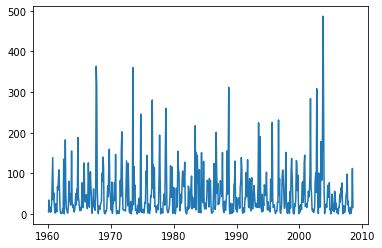

In [5]:
tp = ecm["P"]
# tpc = tp.resample("1M").count()
tp = tp.resample("1M").sum()
# tpc[:50]
plt.plot(tp[:-6])

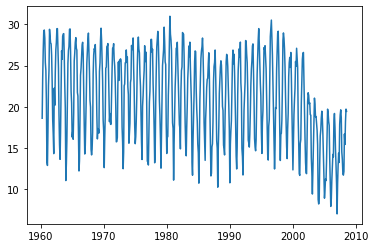

In [6]:
t2m = ecm["T"]
t2m = t2m.resample("1M").mean()
# t2m = t2m.dropna()
plt.plot(t2m[2:-6])

In [ ]:
t2m[8::12]

<BarContainer object of 12 artists>

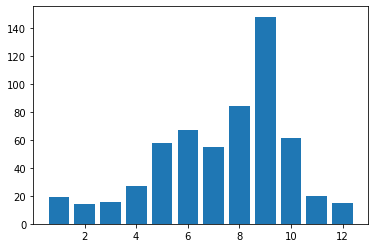

In [15]:
P = pd.DataFrame(tp[:-1].values, tp.index[:-1].month, columns=["P"])
P = P.groupby(P.index)["P"].mean()
plt.bar(P.index, P)

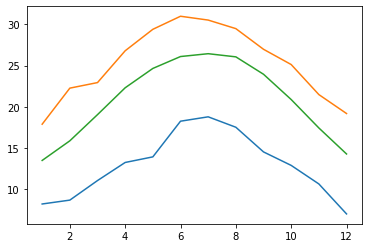

In [35]:
T = pd.DataFrame(t2m[:-1].values, t2m.index[:-1].month, columns=["T"])
Tmin = T.groupby(T.index)["T"].min()
Tmax = T.groupby(T.index)["T"].max()
Tmed = T.groupby(T.index)["T"].mean()
plt.plot(Tmin)
plt.plot(Tmax)
plt.plot(Tmed)

In [32]:
T.mean()

T    20.886545
dtype: float64

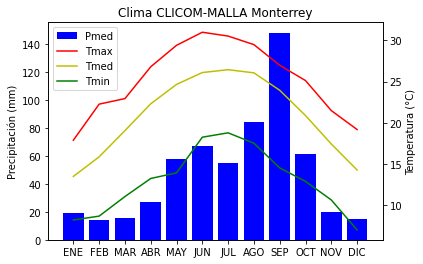

In [23]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(months_id, P, color='b', label='Pmed')
ax2.plot(months_id, Tmax, color='r', label='Tmax')
ax2.plot(months_id, Tmed, color='y', label='Tmed')
ax2.plot(months_id, Tmin, color='g', label='Tmin')

# ax1.set_xlabel('Mes')
ax1.set_ylabel('Precipitación (mm)')
ax2.set_ylabel('Temperatura (°C)')
ax1.set_xticks(months_id)
ax1.set_xticklabels(months_idsp) # rotation=45)
# fig.suptitle('Climate graph')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax1.set_title('Clima CLICOM-MALLA Monterrey')
fig.savefig('./VARIOS/Figures/climate/CLICOM_Monterrey_SP.jpg', dpi=1000, format='jpg', bbox_inches='tight')

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(months_id, P, color='b', label='Pmed')
ax2.plot(months_id, Tmin, color='g', label='Tmin')
ax2.plot(months_id, Tmed, color='y', label='Tmean')
ax2.plot(months_id, Tmax, color='r', label='Tmax')

ax1.set_xlabel('Months')
ax1.set_ylabel('Precipitation (mm)')
ax2.set_ylabel('Temperature (°C)')
ax1.set_xticks(months_id)
ax1.set_xticklabels(months_ids) # rotation=45)
# fig.suptitle('Climate graph')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax1.set_title('Climate CLICOM-MALLA Monterrey')
fig.savefig('./VARIOS/Figures/climate/CLICOM_Monterrey.jpg', dpi=300, format='jpg')

In [ ]:
#Estaciones CNA. Arrange P and T data in csv
#lista de estaciones a extraer
ests = pd.read_csv("D:/DANI/2021/TEMA4_PRONOSTICOS/GIS/Tables/EstacionesId.csv")
# est = est.drop(['FID'], axis=1)
ests = list(ests['Name'])
ests.sort()

pcna = pd.read_csv("./VARIOS/Tables/precip_est.csv", parse_dates=["Unnamed: 0"])
pcna.index = pcna["Unnamed: 0"]
pcna.index.name = None
pcna = pcna.drop(["Unnamed: 0"], axis=1)
# pcna

tcna = pd.read_csv("./VARIOS/Tables/Tmean_est.csv", parse_dates=["Unnamed: 0"])
tcna.index = tcna["Unnamed: 0"]
tcna.index.name = None
tcna = tcna.drop(["Unnamed: 0"], axis=1)
# tcna

# tcna_min = pd.read_csv("./VARIOS/Tables/Tmin_est.csv", parse_dates=["Unnamed: 0"])
# tcna_min.index = tcna_min["Unnamed: 0"]
# tcna_min.index.name = None
# tcna_min = tcna_min.drop(["Unnamed: 0"], axis=1)
# tcna_min

# tcna_max = pd.read_csv("./VARIOS/Tables/Tmax_est.csv", parse_dates=["Unnamed: 0"])
# tcna_max.index = tcna_max["Unnamed: 0"]
# tcna_max.index.name = None
# tcna_max = tcna_max.drop(["Unnamed: 0"], axis=1)
# tcna_max

# ecm = pd.concat([pcm['P'], tcm['T']], axis=1)
# ecm.to_csv('./VARIOS/Tables/clicom_malla_data.csv')

In [ ]:
for est in ests:
    try:
        tp = pcna[str(est)]
        tp = tp.dropna()
        tp = tp.resample("1M").sum()
        t2m = tcna[str(est)]
        t2m = t2m.dropna()
        t2m = t2m.resample("1M").mean()

        P = pd.DataFrame(tp[:-1].values, tp.index[:-1].month, columns=["P"])
        P = P.groupby(P.index)["P"].mean()
        T = pd.DataFrame(t2m[:-1].values, t2m.index[:-1].month, columns=["T"])
        Tmin = T.groupby(T.index)["T"].min()
        Tmax = T.groupby(T.index)["T"].max()
        Tmean = T.groupby(T.index)["T"].mean()

        fig, ax1 = plt.subplots()

        ax2 = ax1.twinx()
        ax1.bar(months_id, P, color='b', label='Pmean')
        ax2.plot(months_id, Tmin, color='g', label='Tmin')
        ax2.plot(months_id, Tmean, color='y', label='Tmean')
        ax2.plot(months_id, Tmax, color='r', label='Tmax')

        ax1.set_xlabel('Months')
        ax1.set_ylabel('Precipitation (mm)')
        ax2.set_ylabel('Temperature (°C)')
        ax1.set_xticks(months_id)
        ax1.set_xticklabels(months_ids) # rotation=45)
        # fig.suptitle('Climate graph')

        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=1)
        ax1.set_title('Climate CNA '+str(est))
        fig.savefig('./VARIOS/Figures/climate/CNA_'+str(est)+'.jpg', dpi=300, format='jpg')
    except Exception:
        print(str(est)+' ERROR')
        pass

In [ ]:
for est in ests:
# est = '19049'
    tp = pcna[str(est)]
    tp = tp.dropna()
    tpc = tp.resample("1M").count()
    tp = tp.resample("1M").sum()
    tp = tp[tpc>=24]
    t2m = tcna[str(est)]
    t2m = t2m.dropna()
    t2mc = t2m.resample("1M").count()
    t2m = t2m.resample("1M").mean()
    t2m = t2m[t2mc>=24]

    P = pd.DataFrame(tp[:-1].values, tp.index[:-1].month, columns=["P"])
    P = P.groupby(P.index)["P"].mean()
    T = pd.DataFrame(t2m[:-1].values, t2m.index[:-1].month, columns=["T"])
    Tmin = T.groupby(T.index)["T"].min()
    Tmax = T.groupby(T.index)["T"].max()
    Tmean = T.groupby(T.index)["T"].mean()
    
    try:
        fig, ax1 = plt.subplots()
        
        ax1.bar(months_id, P, color='b', label='Pmean')
        ax1.set_xlabel('Months')
        ax1.set_ylabel('Precipitation (mm)')
        ax1.set_xticks(months_id)
        ax1.set_xticklabels(months_ids) # rotation=45)
        # fig.suptitle('Climate graph')
#         lines, labels = ax1.get_legend_handles_labels()

        ax2 = ax1.twinx()
        ax2.plot(months_id, Tmin, color='g', label='Tmin')
        ax2.plot(months_id, Tmean, color='y', label='Tmean')
        ax2.plot(months_id, Tmax, color='r', label='Tmax')
        ax2.set_ylabel('Temperature (°C)')
        lines2, labels2 = ax2.get_legend_handles_labels()

        ax1.legend(lines + lines2, labels + labels2, loc=1)
        ax1.set_title('Climate CNA '+str(est))
        fig.savefig('./VARIOS/Figures/climate/CNA_'+str(est)+'.jpg', dpi=300, format='jpg', bbox_inches="tight")
#         plt.cla()
#         plt.clf()
        plt.close('all')
    
    except:
        try:
            print(str(est)+' NO TEMP')

            fig, ax1 = plt.subplots()

            ax1.bar(months_id, P, color='b', label='Pmean')
            ax1.set_xlabel('Months')
            ax1.set_ylabel('Precipitation (mm)')
            ax1.set_xticks(months_id)
            ax1.set_xticklabels(months_ids) # rotation=45)
            # fig.suptitle('Climate graph')
            lines, labels = ax1.get_legend_handles_labels()

            ax1.legend(lines, labels, loc=1)
            ax1.set_title('Climate CNA '+str(est))
            fig.savefig('./VARIOS/Figures/climate/CNA_'+str(est)+'.jpg', dpi=300, format='jpg', bbox_inches="tight")
    #         plt.cla()
    #         plt.clf()
            plt.close('all')

        except Exception:
            print(str(est)+' ERROR')
            pass

# HECHMS and HECDSS automation

## HEC-DSS import reforecasts time series

In [9]:
import pyhecdss #only for environment with Py3.7

In [10]:
os.chdir('D:/DANI/2021/TEMA4_PRONOSTICOS/')
os.listdir()

['CN', 'DATOS', 'DOCS', 'EVA', 'GIS', 'HMS', 'PYR', 'REPORTE', 'RTS', 'SSP']

In [11]:
pcna = pd.read_csv("./DATOS/VARIOS/Tables/precip_est.csv", parse_dates=["Unnamed: 0"])
pcna.index = pcna["Unnamed: 0"]
pcna.index.name = None
pcna = pcna.drop(["Unnamed: 0"], axis=1)
pcna = pcna['19049']
pcna = pcna.dropna()
pcna

1929-01-01    0.0
1929-01-02    0.7
1929-01-03    0.0
1929-01-04    0.0
1929-01-05    0.0
             ... 
2001-12-06    0.0
2001-12-07    0.0
2001-12-08    0.0
2001-12-09    2.5
2001-12-10    0.0
Name: 19049, Length: 21767, dtype: float64

In [ ]:
fname=r'sample.dss'
d = pyhecdss.DSSFile('./HMS/DSS/'+fname, create_new=True)
d.write_its('/SAMPLE/ITS1/RANDOM//IR-YEAR/SAMPLE2/',pcna ,'YYY','INST-VAL') 
# d.write_rts('/SAMPLE/ITS1/RANDOM//1DAY/SAMPLE2/',pcna*2 ,'YYY','INST-VAL')
d.close()

In [ ]:
#Import csv data to hecdss
#Perturbed forecasts
ensemble = [0,1,2,3,4,5,6,7,8,9]
slt = [*range(2,17)]
variables = ['P_228228', 'Rl_169-175', 'Rs_169-175', 'T_121-122', 'Ww_165-166']
vars_dss = {'P_228228':'PRECIP-INC', 'Rl_169-175':'RADIATION-LONG', 'Rs_169-175':'RADIATION-SHORT', 
            'T_121-122':'TEMPERATURE', 'Ww_165-166':'WINDSPEED'}
units_dss = {'P_228228':'MM', 'Rl_169-175':'WATT/M2', 'Rs_169-175':'WATT/M2', 
            'T_121-122':'DEG C', 'Ww_165-166':'M/S'}
type_dss = {'P_228228':'PER-CUM', 'Rl_169-175':'PER-AVER', 'Rs_169-175':'PER-AVER', 
            'T_121-122':'PER-AVER', 'Ww_165-166':'INST-VAL'}

fname=r'reforecasts.dss'
d = pyhecdss.DSSFile('./HMS/DSS/'+fname, create_new=True)

for var in variables:
    for lt in slt:
        # start_lt = 17
        start_lt = lt
        end_lt = start_lt + 3
        print(var, 'lt', start_lt, end_lt)
        
        data = pd.read_csv('./DATOS/ECMWF/nc/csv/wa/'+var+'_lt'+str(start_lt)+str(end_lt)+'_wa.csv', parse_dates=['Unnamed: 0'])
        data.index = data['Unnamed: 0']
        data = data.drop(['Unnamed: 0'], axis=1)
        data.index.name = None
        data.index.freq = '1D'
        
        for ens in ensemble:
            Dataset = 'ECMWF-REF-ENS-'+str(ens+1).zfill(2) #input('Dataset, A ')
            Location = 'RIOLASILLA' #input('Location, B ')
            Variable = vars_dss[var] #input('Variable, C ')
            Timestep = '1Day' #input('Timestep, E ')
            Units = units_dss[var] #input('Units ')
            Type = type_dss[var] #input('Type' )
            Comments = 'LT '+str(start_lt).zfill(2)+'-'+str(end_lt).zfill(2) #input('Comments, F ')
#             path = '/SAMPLE/ITS1/RANDOM//IR-YEAR/SAMPLE2/'
            path = '/'+Dataset+'/'+Location+'/'+Variable+'//'+Timestep+'/'+Comments+'/'
            data_dss = data[str(ens+1)]

            d.write_rts(path, data_dss, Units, Type)
            
d.close()

In [ ]:
#Import csv data to hecdss
#Control forecasts
# ensemble = [0,1,2,3,4,5,6,7,8,9]
slt = [*range(2,17)]
variables = ['P_228228', 'Rl_169-175', 'Rs_169-175', 'T_121-122', 'Ww_165-166']
vars_dss = {'P_228228':'PRECIP-INC', 'Rl_169-175':'RADIATION-LONG', 'Rs_169-175':'RADIATION-SHORT', 
            'T_121-122':'TEMPERATURE', 'Ww_165-166':'WINDSPEED'}
units_dss = {'P_228228':'MM', 'Rl_169-175':'WATT/M2', 'Rs_169-175':'WATT/M2', 
            'T_121-122':'DEG C', 'Ww_165-166':'M/S'}
type_dss = {'P_228228':'PER-CUM', 'Rl_169-175':'PER-AVER', 'Rs_169-175':'PER-AVER', 
            'T_121-122':'PER-AVER', 'Ww_165-166':'INST-VAL'}

fname=r'reforecasts.dss'
d = pyhecdss.DSSFile('./HMS/DSS/'+fname)

for var in variables:
    for lt in slt:
        # start_lt = 17
        start_lt = lt
        end_lt = start_lt + 3
        print(var, 'lt', start_lt, end_lt)
        
        data = pd.read_csv('./DATOS/ECMWF/nc/csv/wa/c_'+var+'_lt'+str(start_lt)+str(end_lt)+'_wa.csv', parse_dates=['Unnamed: 0'])
        data.index = data['Unnamed: 0']
        data = data.drop(['Unnamed: 0'], axis=1)
        data.index.name = None
        data.index.freq = '1D'
        
#         for ens in ensemble:
        Dataset = 'ECMWF-REF-ENS-00' #input('Dataset, A ')
        Location = 'RIOLASILLA' #input('Location, B ')
        Variable = vars_dss[var] #input('Variable, C ')
        Timestep = '1Day' #input('Timestep, E ')
        Units = units_dss[var] #input('Units ')
        Type = type_dss[var] #input('Type' )
        Comments = 'LT '+str(start_lt).zfill(2)+'-'+str(end_lt).zfill(2) #input('Comments, F ')
#             path = '/SAMPLE/ITS1/RANDOM//IR-YEAR/SAMPLE2/'
        path = '/'+Dataset+'/'+Location+'/'+Variable+'//'+Timestep+'/'+Comments+'/'
        
        data_dss = data['c']

        d.write_rts(path, data_dss, Units, Type)
            
d.close()

In [ ]:
#Import csv data to hecdss
#ERA5 data
variables = ['P_228228', 'Rl_169-175', 'Rs_169-175', 'T_121-122', 'Ww_165-166']
vars_name = {'P_228228':'tp', 'Rl_169-175':'strd', 'Rs_169-175':'ssrd', 
            'T_121-122':'t2m', 'Ww_165-166':'w10'}
vars_dss = {'P_228228':'PRECIP-INC', 'Rl_169-175':'RADIATION-LONG', 'Rs_169-175':'RADIATION-SHORT', 
            'T_121-122':'TEMPERATURE', 'Ww_165-166':'WINDSPEED'}
units_dss = {'P_228228':'MM', 'Rl_169-175':'WATT/M2', 'Rs_169-175':'WATT/M2', 
            'T_121-122':'DEG C', 'Ww_165-166':'M/S'}
type_dss = {'P_228228':'PER-CUM', 'Rl_169-175':'PER-AVER', 'Rs_169-175':'PER-AVER', 
            'T_121-122':'PER-AVER', 'Ww_165-166':'INST-VAL'}

fname=r'era5.dss'
d = pyhecdss.DSSFile('./HMS/DSS/'+fname, create_new=True)

data = pd.read_csv('./DATOS/ERA5/ERA5_Land/ERA5_Land_All/csv/wa/era5_all_wa_utm.csv', parse_dates=['Unnamed: 0'])
data.index = data['Unnamed: 0']
data = data.drop(['Unnamed: 0'], axis=1)
data.index.name = None
data.index.freq = '1D'

for var in variables:
    print(var)

#         for ens in ensemble:
    Dataset = 'ERA5-LAND' #input('Dataset, A ')
    Location = 'RIOLASILLA' #input('Location, B ')
    Variable = vars_dss[var] #input('Variable, C ')
    Timestep = '1Day' #input('Timestep, E ')
    Units = units_dss[var] #input('Units ')
    Type = type_dss[var] #input('Type' )
    Comments = 'WA' #input('Comments, F ')
#             path = '/SAMPLE/ITS1/RANDOM//IR-YEAR/SAMPLE2/'
    path = '/'+Dataset+'/'+Location+'/'+Variable+'//'+Timestep+'/'+Comments+'/'

#     data_dss = data_dss[:20].style.format("{:.2f}", decimal=',')
    data_dss = data[vars_name[var]]
    data_dss.name = vars_dss[var]

    d.write_rts(path, data_dss, Units, Type)

d.close()

In [ ]:
data = pd.read_csv('./DATOS/ERA5/ERA5_Land/ERA5_Land_All/csv/wa/era5_all_wa.csv', parse_dates=['Unnamed: 0'])
data.index = data['Unnamed: 0']
data = data.drop(['Unnamed: 0'], axis=1)
data.index.name = None
data.index.freq = '1D'
data_dss = pd.DataFrame(data[vars_name[var]])
data_dss = data_dss[:20].style.format("{:.2f}", decimal=',')


In [ ]:
data_dss

In [ ]:
data.style.format("{:.2f}")

In [ ]:
data[:50].style.format("{:.2f}", decimal=',')

## HEC-DSS read time series

In [ ]:
fname=r'reforecasts.dss'

In [ ]:
d.close()

In [ ]:
#Perturbed forecasts
ensemble = [0,1,2,3,4,5,6,7,8,9]
slt = [*range(2,17)]
variables = ['P_228228', 'Rl_169-175', 'Rs_169-175', 'T_121-122', 'W_165-166']
vars_dss = {'P_228228':'PRECIP-INC', 'Rl_169-175':'RADIATION-LONG', 'Rs_169-175':'RADIATION-SHORT', 
            'T_121-122':'TEMPERATURE', 'Ww_165-166':'WINDSPEED'}
units_dss = {'P_228228':'MM', 'Rl_169-175':'WATT/M2', 'Rs_169-175':'WATT/M2', 
            'T_121-122':'DEG C', 'Ww_165-166':'M/S'}
type_dss = {'P_228228':'PER-CUM', 'Rl_169-175':'PER-AVER', 'Rs_169-175':'PER-AVER', 
            'T_121-122':'PER-AVER', 'Ww_165-166':'INST-VAL'}

fname=r'reforecasts.dss'
d = pyhecdss.DSSFile('./HMS/DSS/'+fname)
catdf=d.read_catalog()
# display(catdf)
    
for var in variables:
    for lt in slt:
        # start_lt = 17
        start_lt = lt
        end_lt = start_lt + 3
        print(var, 'lt', start_lt, end_lt)
        
        data = pd.read_csv('./DATOS/ECMWF/nc/csv/wa/'+var+'_lt'+str(start_lt)+str(end_lt)+'_wa.csv', parse_dates=['Unnamed: 0'])
        data.index = data['Unnamed: 0']
        data = data.drop(['Unnamed: 0'], axis=1)
        data.index.name = None
        data.index.freq = '1D'
        
        for ens in ensemble:
            Dataset = 'ECMWF-REF-ENS-'+str(ens+1).zfill(2) #input('Dataset, A ')
            Location = 'RIOLASILLA' #input('Location, B ')
            Variable = vars_dss[var] #input('Variable, C ')
            Timestep = '1Day' #input('Timestep, E ')
            Units = units_dss[var] #input('Units ')
            Type = type_dss[var] #input('Type' )
            Comments = 'LT '+str(start_lt).zfill(2)+'-'+str(end_lt).zfill(2) #input('Comments, F ')
#             path = '/SAMPLE/ITS1/RANDOM//IR-YEAR/SAMPLE2/'
            path = '/'+Dataset+'/'+Location+'/'+Variable+'//'+Timestep+'/'+Comments+'/'
            data_dss = data[str(ens+1)]


In [ ]:
fname=r'reforecasts.dss'
d = pyhecdss.DSSFile('./HMS/DSS/'+fname)
catdf=d.read_catalog()
plist1=d.get_pathnames(catdf)
dfr1,units1,ptype1=d.read_rts(plist1[0])

In [ ]:
catdf

In [ ]:
plist1

In [ ]:
dfr1

In [ ]:
fdf1=catdf[(catdf.C=='PRECIP-INC') & (catdf.F=='LT 10-13')] #(catdf.A=='ECMWF-REF-ENS-0') &
# display("Catalog filtered for B == 'ITS1' & C=='RANDOM'")
# display(fdf1)
# display("Catalog filtered for B == 'SIN'")
fdf2=catdf[catdf.C=='PRECIP-INC']
display(fdf2.head())

In [ ]:
with pyhecdss.DSSFile('./HMS/DSS/'+fname) as d:
    plist1=d.get_pathnames(fdf1)
    dfr1,units1,ptype1=d.read_rts(plist1[0])
    print('Units: %s'%units1, 'Period Type: %s'%ptype1)
    print('Sample values: ')
    display(dfr1) #.head())
#     plist2=d.get_pathnames(fdf2)
#     dfi1,units2,ptype2=d.read_rts(plist2[0])
#     print('Sample values: ')
#     display(dfi1.head())

In [ ]:
d.read_rts(plist1[10])